E. Berke Tezcan

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



In the world we live in today, social media affects not only our personal lives but the day-to-day operations of businesses as well. With the world being more connected than ever, it is crucial for businesses to be able to read the public opinion about their products and brand, and adapt to changing trends as quickly as possible or even stay ahead of them. Staying connected and being in-the-know not only allows businesses to stay relevant but also provides them with opportunities to achieve and maintain financial success. 

One of the many applications of this idea is when large companies such as Apple or Google hold their keynotes (Apple's WWDC or Google's I/O for example) and release new products, software updates and tease upcoming changes to their services. Another is when senior leadership within these companies attend large conferences and talk about the vision of their company and therefore provide fans with hints as to what they can expect in the future. These are golden opportunities for these companies' marketing teams to gauge interest and gather information on public opinion.

One medium that companies can utilize to read public opinion is Twitter. Millions of people share their thoughts on various topics on Twitter every day, so this makes Twitter a great resource for businesses. For this project, we were hired by Apple to conduct a sentiment analysis of tweets from the SXSW (South by Southwest) Conference. Below are the questions we will be trying to provide insights for:

**1. How is Apple perceived as a company during the SXSW Conference, and how does this compare to Google as one of their main competitors?**

**2. How are Apple and Google's products and announcements perceived during the SXSW Conference? Are there specific pain points within the products that they should address?**

Additionally, we will be training and testing different machine learning models that can classify tweets based on their sentiment. Apple can leverage these models to read the public opinion and stay ahead of their competition.

# OBTAIN

In [112]:
#Option to run gridsearches within the notebook
run_gridsearches = False

In [113]:
#importing necessary libraries
import pandas as pd
import nltk

We will be using a dataset from data.world provided by CrowdFlower which has tweets about Apple and Google from the South by Southwest (SXSW) conference. The tweet labels were crowdsourced and reflect which emotion they convey and what product/service/company this emotion is directed at based on the content.

In [114]:
df = pd.read_csv('data/tweet_data_apple_google.csv', encoding='latin-1')
df.head()

tweet_text  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

The column names are unnecessarily long and difficult to read. We can rename the columns to make it easier for readability and interpretability.

In [115]:
df.columns = ['Tweet', 'Product/Brand', 'Emotion']
df.head()

Tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Product/Brand           Emotion  
0              iPhone  Negative emotion  
1  iPad or iPhone App  Positive emotion  
2                iPad  Positive emotion  
3  iPad or iPhone App  Negative emotion  
4              Google  Positive emotion

Now we can take a look at the unique values for the Product/Brand and Emotion columns to see what we are working with.

In [116]:
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [117]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

We can see that we have a lot of information on different services/products for each company along with a null value ad well as an "I can't tell" emotion which we will be handling below.

# SCRUB

## Addressing Missing/Placeholder Values

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


It seems like we are missing the body of text for 1 tweet and a total of 5,802 tags for which product/company the corresponding tweet was about. Let's start with looking at the missing tweet.

In [119]:
df[df['Tweet'].isna()]

Tweet Product/Brand                             Emotion
6   NaN           NaN  No emotion toward brand or product

We are missing all the information from this row of data and without text data this row is of no use to us so we can go ahead and drop it.

In [120]:
df = df[df['Tweet'].isna() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


Now, let's take a closer look at the product/company column's missing values.

In [121]:
df[df['Product/Brand'].isna()].head()

Tweet  \
5   @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd   
16                                                  Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw   
32                                           Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}   
33                                                                                                 Anyone at  #sxsw want to sell their old iPad?   
34                                                                 Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?   

   Product/Brand                             Emotion  
5            NaN  No emotion toward brand or product  
16           NaN  No emotion toward brand or product  
32           NaN  No emotion toward brand or product  
33           NaN  No emotion toward brand or product  
34           NaN  No emotion toward brand or product

These tweets are not really directed towards a specific product or brand so we can go ahead and fill the null values with "Unknown" as a placeholder value for the time being.

In [122]:
df['Product/Brand'].fillna('Unknown', inplace=True)

In [123]:
#verifying that null values have been handled
df.isna().sum()

Tweet            0
Product/Brand    0
Emotion          0
dtype: int64

## Scrubbing Emotion Column

In [124]:
df['Emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

Similar to the initial column names, the values in the emotion column can be cleaned up a bit for easy interpretability and to shorten the amount of typing for the code.

In [125]:
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 
                'No emotion toward brand or product': 'Neutral', "I can't tell": 'Unknown'}
df['Emotion'] = df['Emotion'].map(emotion_dict)
df.head()

Tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Product/Brand   Emotion  
0              iPhone  Negative  
1  iPad or iPhone App  Positive  
2                iPad  Positive  
3  iPad or iPhone App  Negative  
4              Google  Positive

In [126]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Unknown      156
Name: Emotion, dtype: int64

Now we can take a look at the tweets with "Unknown" emotion values to see if we can notice any patterns or tell easily whether the tweet has a negative, neutral or positive emotion.

In [127]:
pd.set_option("display.max_colwidth", 300)
df[df['Emotion']=='Unknown']

Tweet  \
90                                     Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh   
102                         ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow   
237                              Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
341                                                                          The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw   
368                                       Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link}   
...                                                                                                                                                     ...   
9020              It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW   
9032                                                                                    @mention yeah, we have @mention , Google has nothing on us :) #SXSW   
9037                                                                      @mention Yes, the Google presentation was not exactly what I was expecting. #sxsw   
9058  &quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?   
9066                    How much you want to bet Apple is disproportionately stocking the #SXSW pop-up store with iPad 2? The influencer/hipsters thank you   

     Product/Brand  Emotion  
90         Unknown  Unknown  
102        Unknown  Unknown  
237        Unknown  Unknown  
341        Unknown  Unknown  
368        Unknown  Unknown  
...            ...      ...  
9020       Unknown  Unknown  
9032       Unknown  Unknown  
9037       Unknown  Unknown  
9058       Unknown  Unknown  
9066         Apple  Unknown  

[156 rows x 3 columns]

Arguably, these tweets are difficult to classify without more context. Some of the tweets could be taken as sarcastic or genuine depending on the context. 

Since we need to have labels for our models, these tweets will not be useful in developing our model. Luckily they only make up approximately 1.7% of our data so we can go ahead and drop these rows.

In [128]:
df = df[df['Emotion']!='Unknown']
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

## Checking for and Addressing Duplicates

Now that we've addressed null values, and cleaned up our dataset a little bit more, next step is to check for duplicates to see if we have the same tweets represented multiple times.

In [129]:
len(df[df.duplicated()])

22

It looks like we have 22 tweets that are duplicated in the dataset. Let's take a look at the duplicates for reference.

In [130]:
df[df.duplicated()]

Tweet  \
468                                                                                                     Before It Even Begins, Apple Wins #SXSW {link}   
776                                                              Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
2232                                                Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
2559                                                          Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
3950  Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW   
3962        #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
4897                   Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   
5338                                          RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
5341                     RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter   
5881                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5882                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5883                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5884                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5885                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
6296                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6297                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6298                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6299                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6300                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
6546                                     RT @mention RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
8483                  I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   
8747                                        Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?   

           Product/Brand   Emotion  
468                Apple  Positive  
776              Unknown   Neutral  
2232             Unknown   Neutral  
2559               Apple  Positive  
3950         Android App  Positive  
3962             Android  Positive  
4897  iPad or iPhone App  Positive  
5338             Unknown   Neutral  
5341             Unknown   Neutral  
5881             Unknown   Neutral  
5882             Unknown   Neutral  
5883             Unknown   Neutral  
5884             Unknown   Neutral  
5885             Unknown   Neutral  
6296              Google  Positive  
6297      

In [131]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          8914 non-null   object
 1   Product/Brand  8914 non-null   object
 2   Emotion        8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


Now that the duplicates have been addressed too we can perform an EDA on the data.

# EXPLORE

With the business problem in mind, it is important to isolate and analyze positive and negative tweets as a whole as well as on a company and product basis. We will start our exploration with positive tweets.

## Tweets with Positive Sentiment

In [132]:
#parsing positive tweets into new df
df_positive = df[df['Emotion']=='Positive']
#verifying that neutral and negative tweets have been removed
df_positive['Emotion'].value_counts()

Positive    2970
Name: Emotion, dtype: int64

In [133]:
#parsing tweets into a list
corpus_pos = df_positive['Tweet'].to_list()
corpus_pos[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

### Tokenization

For tokenizing the tweets we will be using the TweetTokenizer throughout this project since it has built-in functionality such as processing handles and hashtags correctly unlike other tokenizers. We will drop any handles from the tweets since we are mainly focused on the content of the tweet.

In [134]:
from nltk import TweetTokenizer
import string

#functionize tokenization of tweets
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken 
    down into tokens based on TweetTokenizer from the nltk package.
    -------------------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case
    stip_handles: whether to remove twitter handles"""
    
    tokenizer = TweetTokenizer(preserve_case=preserve_case, strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [135]:
#tokenize positive tweets
tokens_pos = tokenize_tweets(corpus_pos)

In [136]:
#displaying 10 most common tokens
from nltk import FreqDist
freq = FreqDist(tokens_pos)
freq.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1214),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

We can see that our tokens contain a lot of punctuation and stop words like "to" and "at" since we haven't removed these yet. Prior to removing these though, we will be lemmatizing the tokens to make sure we're capturing any stop words that may be generated with this process.

### Lemmatization

In [137]:
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')

#functionize lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in by using WordNetLemmatizer and 
    returns lemmatized tokens.
    -------------------------------
    Arguments:
    tokens_list: a tokens list
    """
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

In [138]:
#lemmatizing positive tweet tokens
tokens_pos_lemm = lemmatize_tokens(tokens_pos)

In [139]:
#displaying most common 10 tokens
from nltk import FreqDist
freq = FreqDist(tokens_pos_lemm)
freq.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1218),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

We can see that we still have punctuation and stop words in our list since we did not remove these yet. Now that we lemmatized our tokens, since the stop words and punctuation arguably does not reveal anything about the sentiment of the tweets, we can go ahead and remove them. This will allow us to see more relevant information and will allow for models to perform better.

### Stop Word/Punctuation Removal

In [140]:
#getting stopwords from nltk
from nltk.corpus import stopwords
stop_lst = stopwords.words('english')
stop_lst += list(string.punctuation)
#adding additional characters and empty string to stop words
additional_punc = ['“','”','...',"''",'’','``','']
stop_lst += additional_punc

In [141]:
#functionizing removal of stop words
def remove_stop(tokens, stop_list=stop_lst):
    
    """Function removes stop words from a given tokens list based on a stop word list.
    -------------------------------
    Arguments:
    tokens: a tokens list
    stop_list: a list containing stop words to be removed from tokens"""
    
    #encoding/decoding tokens to eliminate unrecognized symbols and eliminating external links
    tokens_stopped = [word.encode('ascii','ignore').decode() for word in tokens 
                      if (word not in stop_list) & (word.startswith('http') == False)]
    
    return tokens_stopped

In [142]:
#removing stop words from lemmatized tokens
tokens_pos_ls = remove_stop(tokens_pos_lemm)

In [143]:
#displaying most common 50 tokens
from nltk import FreqDist
freq = FreqDist(tokens_pos_ls)
freq.most_common(50)

[('#sxsw', 2983),
 ('link', 1218),
 ('ipad', 1010),
 ('rt', 931),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('', 443),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('sxsw', 144),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('#sxswi', 96),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88)]

When we look at our updated most common 50 words list above, we can see that we still have some words that do not provide us with useful information about the sentiment of the tweets. Since we already know that the tweets are from the SXSW Conference, we can remove hashtags like '#sxsw' by adding them to the stop words list. Additionally, words like 'link' and 'rt' seem to be referring to external links and retweets respectively. However, 'link' could also have been used with its dictionary meaning. In order to understand how a word appears in our corpus we can build a function that can take a random sample of tweets out of the corpus, check whether the word we are looking for appears in any of the tweets and display the tweets that the word appears in.

In [144]:
#adding sxsw to stop list
stop_lst += ['#sxsw', '#sxswi', 'sxsw']

In [145]:
#defining a function that will provide context for a given word

import numpy as np
def context_finder(word, corpus, n_samples=5, n_count=5):
    """This function takes n_samples with each sample having n_count tweets from the given corpus,
    and displays tweets that have the specified word in them. The goal of the function is to get 
    some context about a word.
    -------------------------------
    Arguments:
    word: a word that the function will be providing context for
    corpus: a document that the word is contained in
    n_samples: how many samples will be collected
    n_count: how many tweets each sample will contain
    """
    
    i=0
    
    for _ in list(range(0,n_samples)):
        sample = np.random.choice(corpus, n_count)
        for tweet in sample:
            if word in tweet:
                print(tweet)
                i += 1
    print('-----------------------------------')
    print(f'Out of {n_count*n_samples} tweets analyzed, {i} tweets had the word "{word}" in them.')

In [146]:
#verifying that 'link' is used in reference to external web links
context_finder('link', corpus_pos)

Ok, I'm interested. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
#qagb #sxsw Timely! RT @mention Bing's search engine share continues to rise, up to 13.6%. Google still tops at 65.4% {link}
Apple pop-up at #SXSW!? Ordinance on the front line! (Admission is the first step to recovery) {link}
Bored during keynote #sxsw, but have an iPad  {link}
RT @mention Backupify Announces CloudSight Search, the First Searchable Archive Solution for Social Media and Google Apps #SXSW #SXSWi {link}
Looks very interesting RT@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
Apple sets up temporary Austin store to serve the hordes of iPad 2 purchasers at #sxsw {link}
-----------------------------------
Out of 25 tweets analyzed, 7 tweets had the word "link" in them.


We see that the word 'link' is mainly used to refer to web links that were removed when the data was being parsed into the dataset. This doesn't provide us with any valuable insights into what the tweet may be about so we can go ahead and add the word to our stop words list.

In [147]:
stop_lst += ['link']

Now, we can take a look at 'RT' to confirm that it was used to refer to retweets.

In [148]:
context_finder('RT', corpus_pos)

RT @mention YES! updated iPhone app has song info @mention 24/7 stream +others also live video streaming for #SXSW {link}
RT @mention The most valuable device at #sxsw so far is the #apple #iPod #iPhone charger.
RT @mention The Beluga iPhone app is the highlight of this #SXSW. Excellent way to coordinate the #sxsw4japan relief effort.
RT @mention deviantART buys 3 iPad 2's in Austin, tests Muro drawing, it's super fast!! #deviantART #SXSW httÛ_ (cont) {link}
RT @mention It's our last day here at the #fastcompanygrille -- come by for the last day of iPhone makery! #zazzlesxsw #sxsw
Fear not! Now extended through Wed! --&gt; RT @mention RT @mention Last day for Apple popup is Sunday 3/13 #SXSW #AppleATXdt
RT @mention RT @mention Heard about Apple's pop-up store in downtown Austin? Pics are already on Gowalla: {link} #sxsw [Pop-POP!]
-----------------------------------
Out of 25 tweets analyzed, 7 tweets had the word "RT" in them.


We can see that in all cases 'RT', or 'rt' since our tokenizer changed it to lower case, was used to denote a retweet. Therefore, we can add it to our stop words list as well.

In [149]:
stop_lst += ['rt']

In [150]:
#updating the tokens list with updated stop words list
tokens_pos_ls = remove_stop(tokens_pos_ls, stop_list=stop_lst)

### 50 Most Frequent Words in Positive Tweets

One way to get some valuable insights about the tweets is to take a look at the most frequently occuring words in the tweets.

In [151]:
#defining a function to find the n most common tokens

def find_frequent(tokens, n=50):
    """Function returns the n most common words along with their frequencies based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    n: number of top words to be returned"""
    
    freq = FreqDist(tokens)
    display(freq.most_common(n))

In [152]:
#displaying 50 most frequent words
find_frequent(tokens_pos_ls)

[('ipad', 1010),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82),
 ('#iphone', 82),
 ('got', 81),
 ('apps', 78)]

Perhaps, not surprisingly, we see that the most common words include 'apple' and 'google', but there are additional words such as 'circle', 'launch' and 'store' in here that show us more about what the people were excited about. However, we are only looking at 50 words and there may be additional information here that we are missing. To address this, we can visualize this information in word clouds.

### WordCloud with Product/Company Information for Positive Tweets 

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='black', colormap='Greens', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations, background_color=background_color, colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

We can start with generating a word cloud for the tokens we were looking at above.

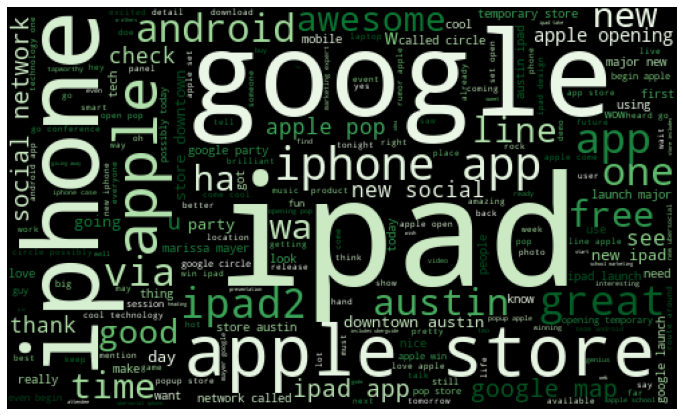

In [154]:
#generating word cloud
cloud_pos_w_company = generate_wordcloud(tokens_pos_ls, collocations=True)

This is a great visualization to get a better sense of what the public was tweeting about in a positive way. We can see that a lot of people seem to be excited about iPads and the iPad 2 launch and unsurprisingly, are tweeting about Apple and Google. We can dive even deeper and remove product/company names from our word cloud to see if we can find additional details.

### WordCloud without Product/Company Information for Positive Tweets

In [155]:
#removing product/company names
stop_lst_no_comp = stop_lst + ['ipad', 'apple', 'google', 'iphone', '#apple', 
                               '#google', '#ipad', '#iphone', 'android']
tokens_pos_ls = remove_stop(tokens_pos_ls, stop_list=stop_lst_no_comp)

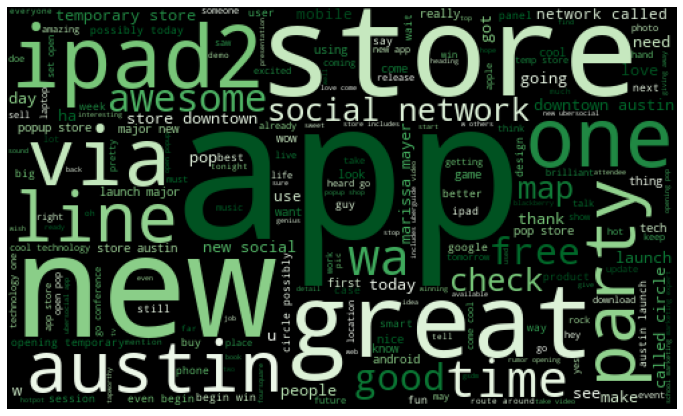

In [156]:
cloud_pos_wo_company = generate_wordcloud(tokens_pos_ls, collocations=True)

We can now see additional details about the tweets' contents. A lot of people were excited about a new apple store, perhaps some new apps and being in Austin.

### Bigrams for Positive Tweets

Similar to the most common 50 words, looking at the most common bigrams can also be helpful in providing context to these tweets.

In [157]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [158]:
#initializing finder
finder_pos = BigramCollocationFinder.from_words(tokens_pos_ls)

In [159]:
#getting frequency information from finder
bigrams = finder_pos.score_ngrams(bigram_measures.raw_freq)

In [160]:
bigrams[:50]

[(('pop-up', 'store'), 0.004340211680499505),
 (('social', 'network'), 0.0032741947765171707),
 (('temporary', 'store'), 0.00304576258280667),
 (('new', 'social'), 0.00293154648595142),
 (('store', 'downtown'), 0.0026650422599558366),
 (('downtown', 'austin'), 0.002626970227670753),
 (('2', 'launch'), 0.002208177872534836),
 (('called', 'circle'), 0.0021701058402497525),
 (('network', 'called'), 0.0021701058402497525),
 (('marissa', 'mayer'), 0.0021320338079646693),
 (('launch', 'major'), 0.002055889743394502),
 (('major', 'new'), 0.002055889743394502),
 (('popup', 'store'), 0.002055889743394502),
 (('store', 'austin'), 0.0019036016142541688),
 (('pop', 'store'), 0.0017513134851138354),
 (('austin', '2'), 0.0016370973882585853),
 (('opening', 'temporary'), 0.0016370973882585853),
 (('possibly', 'today'), 0.0015609533236884184),
 (('circle', 'possibly'), 0.001522881291403335),
 (('even', 'begin'), 0.001522881291403335),
 (('cool', 'technology'), 0.0012944490976928348),
 (('ever', 'heard

Once again, we can see that a lot of people are excited about a new and temporary pop-up store downtown, ipad 2 launch, Google's Marissa Mayer and a new social network called circle.

Now that we have a preliminary understanding of the positive tweets, we can take a look at the negative tweets.

## Tweets with Negative Sentiment

In [161]:
#parsing positive tweets into new df
df_negative = df[df['Emotion']=='Negative']
#verifying that neutral and negative tweets have been removed
df_negative['Emotion'].value_counts()

Negative    569
Name: Emotion, dtype: int64

In [162]:
#parsing tweets into a list
corpus_neg = df_negative['Tweet'].to_list()
corpus_neg[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw']

### Tokenization/Lemmatization/Stop Word Removal

In [163]:
#tokenize tweets
tokens_neg = tokenize_tweets(corpus_neg)
#lemmatize tweets
tokens_neg_lemm = lemmatize_tokens(tokens_neg)
#remove stop words & punctuation using the same stop words list
tokens_neg_ls = remove_stop(tokens_neg_lemm, stop_list = stop_lst)

### 50 Most Frequent Words in Negative Tweets

In [164]:
find_frequent(tokens_neg_ls)

[('ipad', 179),
 ('iphone', 145),
 ('google', 136),
 ('apple', 100),
 ('2', 81),
 ('', 69),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('ha', 31),
 ('circle', 29),
 ('design', 29),
 ('people', 29),
 ('social', 28),
 ('apps', 26),
 ('get', 25),
 ('wa', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 23),
 ('launch', 22),
 ('one', 22),
 ('day', 21),
 ('today', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('android', 19),
 ('#ipad', 19),
 ('would', 19),
 ('network', 18),
 ('phone', 18),
 ('headache', 17),
 ('news', 17),
 ('go', 17),
 ('long', 17),
 ('product', 17),
 ("i've", 16),
 ("i'm", 16),
 ('battery', 16),
 ('user', 15),
 ('thing', 15),
 ('#apple', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15)]

Once again, we see that Apple and Google are mentioned quite a few times in the negative tweets along with words such as 'design' and 'launch'. We can visualize and try to dig deeper.

### WordCloud with Product/Company Information for Negative Tweets

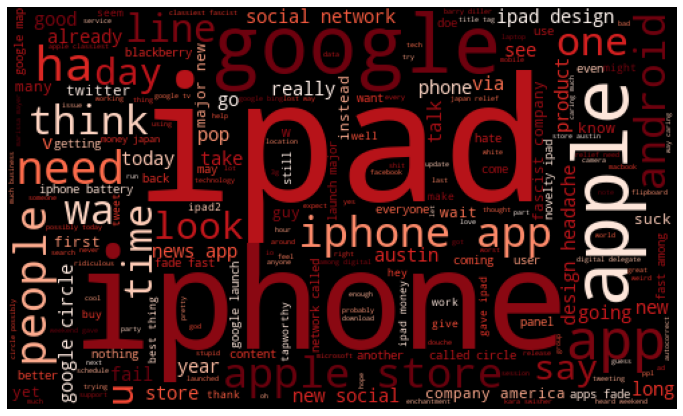

In [165]:
#generating word cloud for negative tweets
cloud_neg_w_company = generate_wordcloud(tokens_neg_ls, colormap='Reds', collocations=True)

It looks like the iPad and the iPhone are mentioned often in the negative tweets along with their designs with Google and Android also visible. Once again, we can remove the company names and product lines to see if we can see any additional information.

### WordCloud without Product/Company Information for Negative Tweets

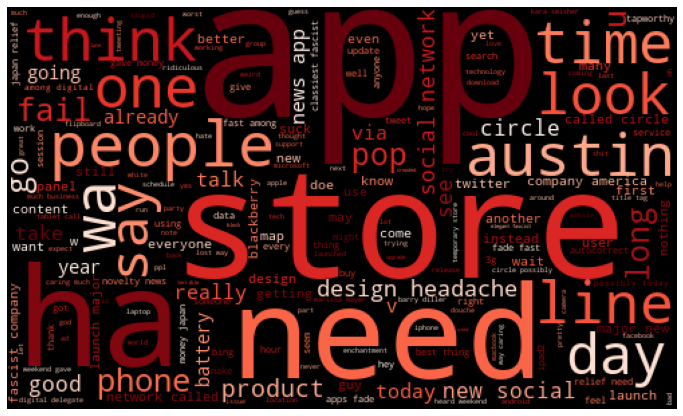

In [166]:
#removing company/product information from the tokens
tokens_neg_ls = remove_stop(tokens_neg_ls, stop_list=stop_lst_no_comp)
#generating word cloud
cloud_neg_wo_company = generate_wordcloud(tokens_neg_ls, colormap='Reds', collocations=True)

We can see that most negative tweets were talking about stores and apps. Additionally, there are a lot of opinions being shared based on words like "think" or "fail".

### Bigrams for Negative Tweets

In [167]:
#initializing finder
finder_neg = BigramCollocationFinder.from_words(tokens_neg_ls)
#getting frequency information from finder
bigrams_neg = finder_neg.score_ngrams(bigram_measures.raw_freq)
#displaying top 50 bigrams
bigrams_neg[:50]

[(('design', 'headache'), 0.003249235474006116),
 (('new', 'social'), 0.0030581039755351682),
 (('social', 'network'), 0.0028669724770642203),
 (('company', 'america'), 0.002484709480122324),
 (('fascist', 'company'), 0.0022935779816513763),
 (('major', 'new'), 0.0022935779816513763),
 (('network', 'called'), 0.002102446483180428),
 (('called', 'circle'), 0.00191131498470948),
 (('launch', 'major'), 0.00191131498470948),
 (('fade', 'fast'), 0.0017201834862385322),
 (('fast', 'among'), 0.0017201834862385322),
 (('news', 'apps'), 0.0017201834862385322),
 (('novelty', 'news'), 0.0017201834862385322),
 (('#japan', 'relief'), 0.0015290519877675841),
 (('2', 'money'), 0.0015290519877675841),
 (('best', 'thing'), 0.0015290519877675841),
 (('classiest', 'fascist'), 0.0015290519877675841),
 (('gave', '2'), 0.0015290519877675841),
 (("i've", 'heard'), 0.0015290519877675841),
 (('need', '2'), 0.0015290519877675841),
 (('relief', 'need'), 0.0015290519877675841),
 (('thing', "i've"), 0.001529051987

Looking at the bigrams once again, we can see that the new social network, Circle, is being mentioned negatively (while it was also mentioned positively before), and there seems to be some comments about the companies themselves.

## Comparison of Positive & Negative Tweets

It is easier to compare the wordclouds we generated above when they are side-by-side.

In [168]:
def compare_wordclouds(wc1, wc2):
    """Function plots two wordclouds side-by-side for easy comparison
    -------------------------------
    Arguments:
    wc1: first wordcloud to be plotted
    wc2: second wordcloud to be plotted"""
    fig, ax = plt.subplots(figsize=(30,20), ncols=2)
    ax[0].imshow(wc1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(wc2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.tight_layout();

### With Company/Product Information

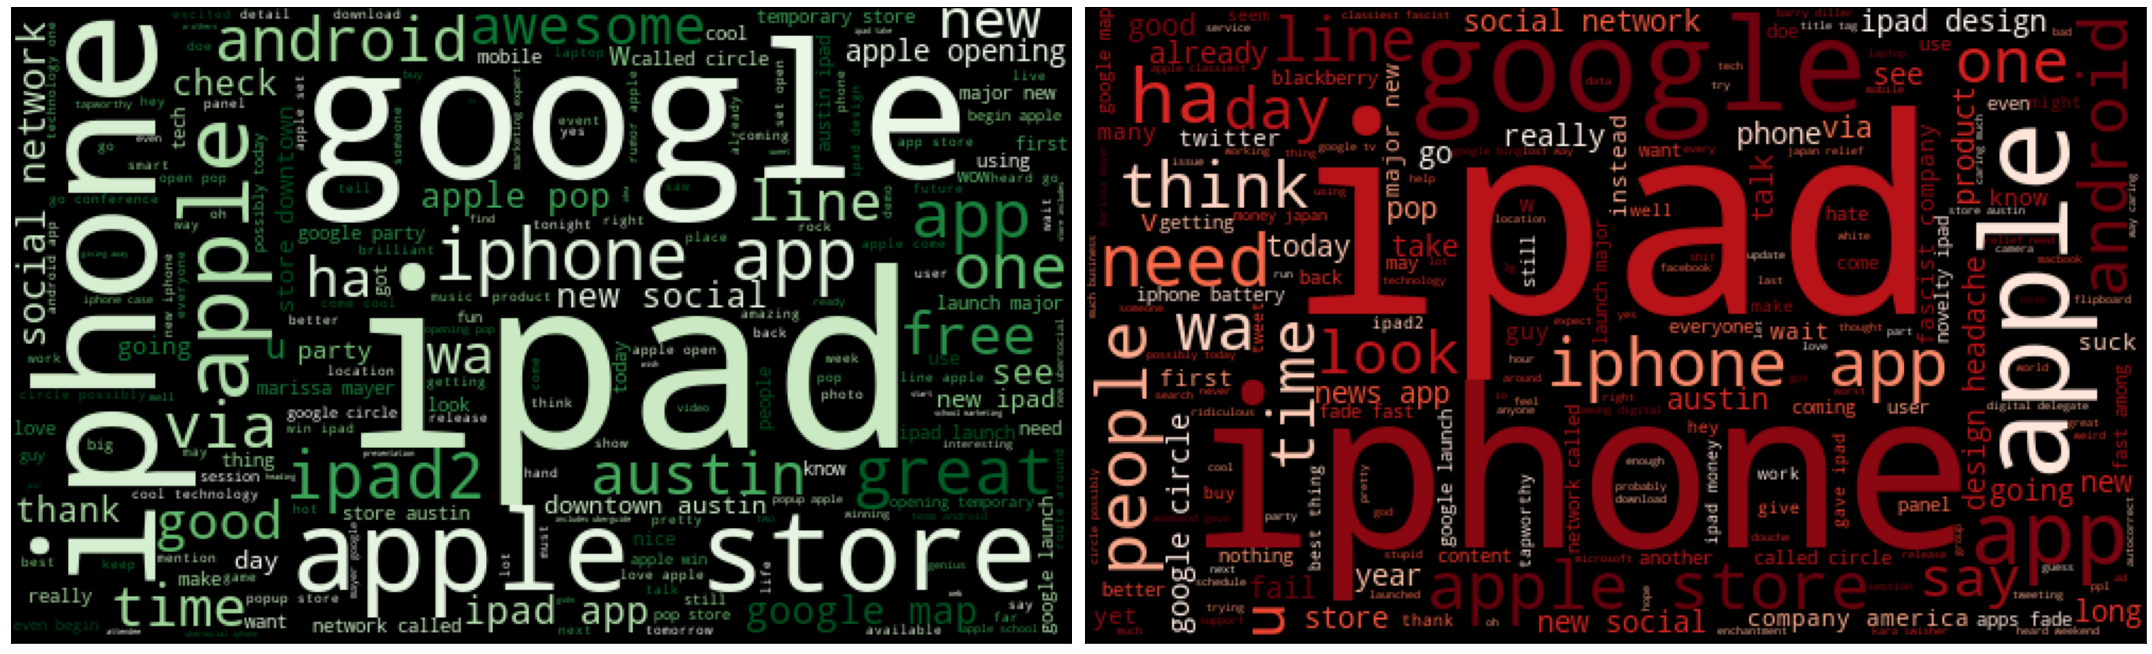

In [169]:
compare_wordclouds(cloud_pos_w_company, cloud_neg_w_company)

As discussed above, we can see that both companies, Apple and Google as well as their products are mentioned extensively in both negative and positive tweets. Even though these wordclouds are a good starting point, it is difficult to extract any specific insights about the companies or products based on these.

### Without Company/Product Information

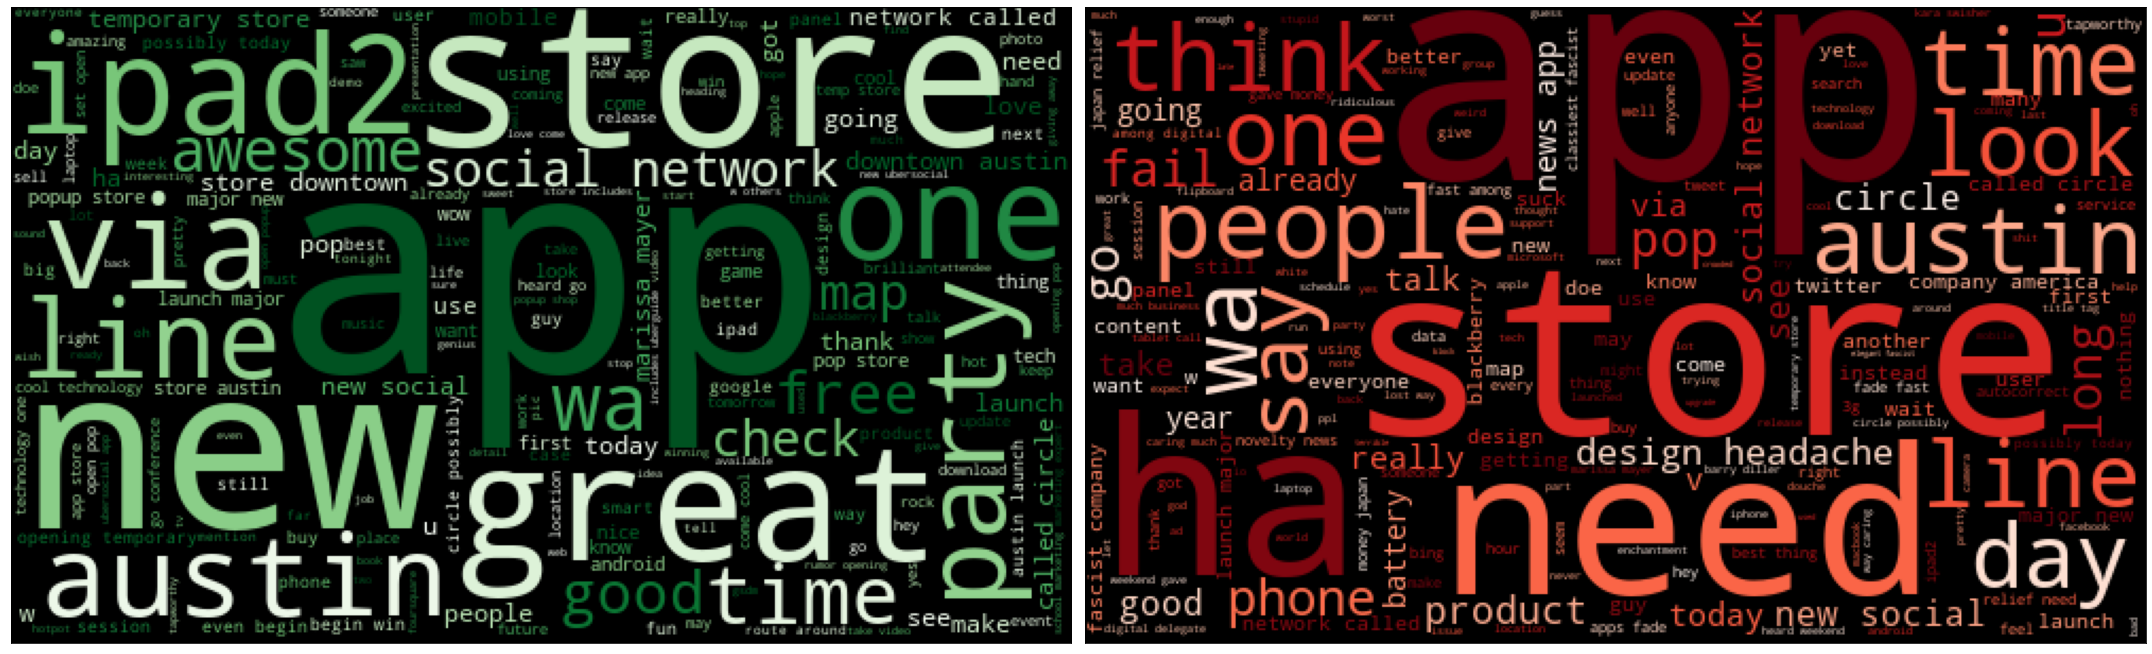

In [170]:
compare_wordclouds(cloud_pos_wo_company, cloud_neg_wo_company)

Removing the company and product names help in seeing additional information, but since we have both companies represented in each group of tweets, it is not possible to tell which company's store is mentioned in a negative way for example. In order to address this we can make our analysis more granular and look at tweets not only based on their sentiment but also based on specific companies and specific products.

## Tweets Related to Apple

### Feature Engineering Company Column

In order to find tweets that are only about apple we can create a new column that can show what company the tweet was about. To achieve this, we can simply use the Product/Brand column and map the products to their respective companies.

In [171]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [172]:
#mapping products to brands
brand_dict={'iPhone': 'Apple', 'iPad or iPhone App': 'Apple', 'iPad': 'Apple', 
            'Google': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Apple': 'Apple', 'Android App': 'Google',
            'Other Google product or service': 'Google',
            'Other Apple product or service': 'Apple'}
df['Brand'] = df['Product/Brand'].map(brand_dict)
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [173]:
df_apple = df[df['Brand']=='Apple']
corpus_apple = df_apple['Tweet'].to_list()

In [174]:
#tokenize tweets
tokens_apple = tokenize_tweets(corpus_apple)
#lemmatize tweets
tokens_apple_lemm = lemmatize_tokens(tokens_apple)
#remove stop words & punctuation using the same stop words list
tokens_apple_ls = remove_stop(tokens_apple_lemm, stop_list = stop_lst)

### Word Cloud with Company/Product Information

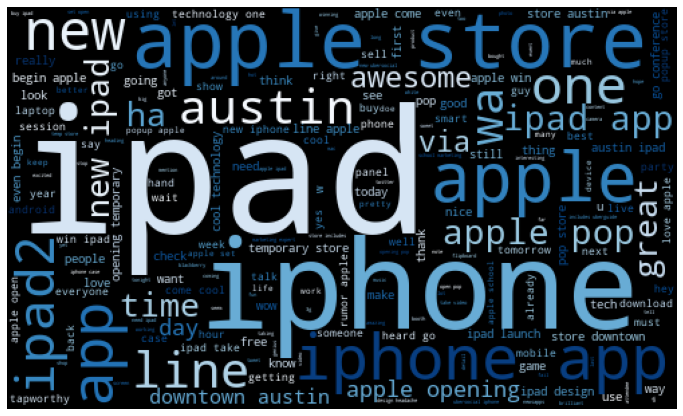

In [175]:
#generating word cloud for negative tweets
generate_wordcloud(tokens_apple_ls, colormap='Blues', collocations=True)

### Word Cloud without Company/Product Information

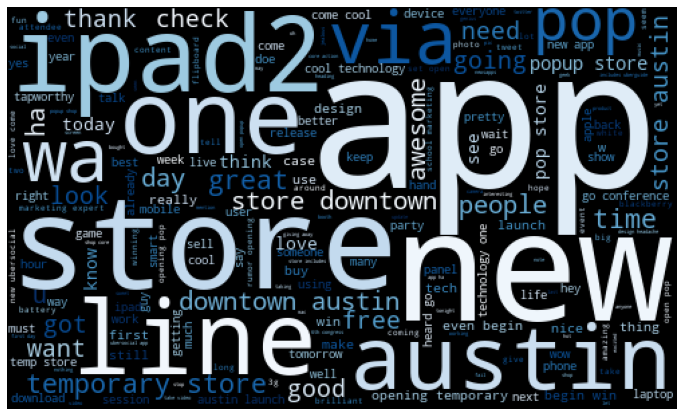

In [176]:
tokens_apple_ls = remove_stop(tokens_apple_ls, stop_list = stop_lst_no_comp)
generate_wordcloud(tokens_apple_ls, colormap='Blues', collocations=True)

### Percentage of Positive, Neutral and Negative Sentiment

Extracting the percentage of tweets that had positive, neutral or negative sentiment is also a good way of gauging whether the company was mentioned mostly one way or another.

In [177]:
df_apple_sentiment = pd.DataFrame(df_apple['Emotion'].value_counts(normalize=True)).reset_index()
df_apple_sentiment.columns=['Emotion', 'Percentage']
display(df_apple_sentiment)
df_apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Emotion  Percentage
0  Positive    0.811431
1  Negative    0.161452
2   Neutral    0.027117

Text(0.5, 1.0, 'Sentiment Percentages for Tweets about Apple')

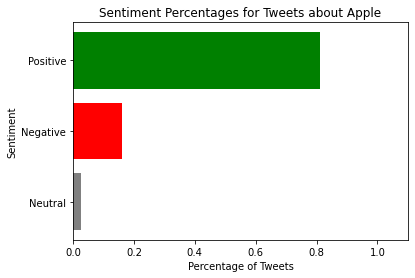

In [178]:
fig, ax = plt.subplots()
ax.barh(df_apple_sentiment['Emotion'], df_apple_sentiment['Percentage'], color=['Grey', 'Red', 'Green'])
ax.set_xlim(0, 1.1)
ax.set_xlabel('Percentage of Tweets')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Percentages for Tweets about Apple')

Above, we can see that most tweets that were connected to Apple were positive (81.1%) while 16.1% of tweets were negative and 2.7% were neutral. This is very helpful to see since it indicates that the view of Apple as a company and it's products and services are mostly positive. However, this does not provide us with information on where the areas of improvement should be or what is liked about Apple's products. In order to get a better understanding, we can conduct our analysis on a product/service level under Apple.

### Sentiment Analysis on Apple Related Products/Services

In [179]:
#defining function that generates product wordclouds based on company and emotion
def generate_product_wordcloud(company, emotion, stop_lst, colormap='Greens'):
    """Function generates wordclouds for products/services of a specified company and emotion. 
    The wordcloud objects and the figure showing the wordclouds are returned respectively.
    -------------------------------
    Arguments:
    company: company that the wordcloud will be isolating
    emotion: emotion of tweets that the wordcloud will be based on
    stop_lst: a list containing stop words to be removed from tokens"""
    
    company_df = df[df['Brand']==company]
    final_df = company_df[company_df['Emotion']==emotion]
    product_lst = list(final_df['Product/Brand'].unique())
    
    wordclouds={}
    
    for product in product_lst:
        token_df = final_df[final_df['Product/Brand']==product]
        corpus = token_df['Tweet'].to_list()
        #tokenize tweets
        tokens_company = tokenize_tweets(corpus)
        #lemmatize tweets
        tokens_company_lemm = lemmatize_tokens(tokens_company)
        #remove stop words & punctuation using the same stop words list
        tokens_company_ls = remove_stop(tokens_company_lemm, stop_list = stop_lst)
        wordclouds[product] = generate_wordcloud(tokens_company_ls, collocations=True, 
                                                 colormap=colormap, display=False)
    
    fig, ax = plt.subplots(figsize=(12,15),
                           nrows=len(wordclouds))
    for i, product in enumerate(product_lst):
        ax[i].set_title(product)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].imshow(wordclouds[product])
        plt.tight_layout();
    
    return wordclouds, fig

#### Positive Sentiment by Product/Service Type

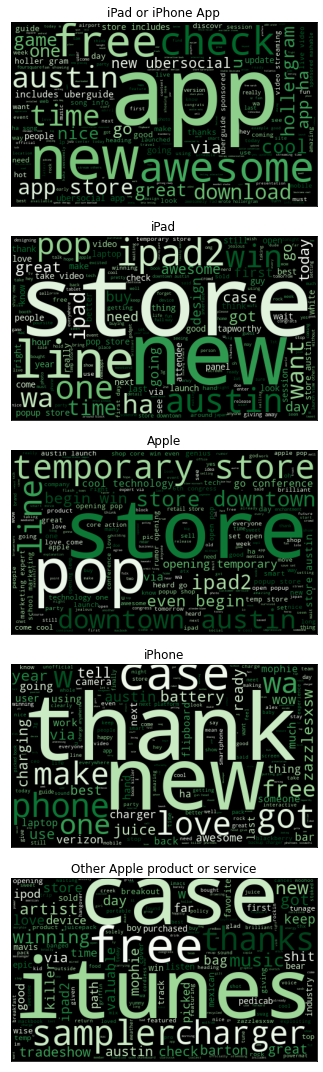

In [180]:
wordcloud_apple_pos, fig_apple_pos = generate_product_wordcloud('Apple', 'Positive', stop_lst_no_comp)

Here we can see that the word "free" comes up a lot for iPad and iPhone apps as well as other Apple products such as iTunes, which may indicate that people enjoy these free products. Additionally, we can see that people are excited about the "new" iPhone so much so that words like "thank" and "love" occur frequently. Lastly, Apple's temporary pop-up store seems to be taken positively by the public so Apple should consider opening a permanent store at this location.

#### Negative Sentiment by Product/Service Type

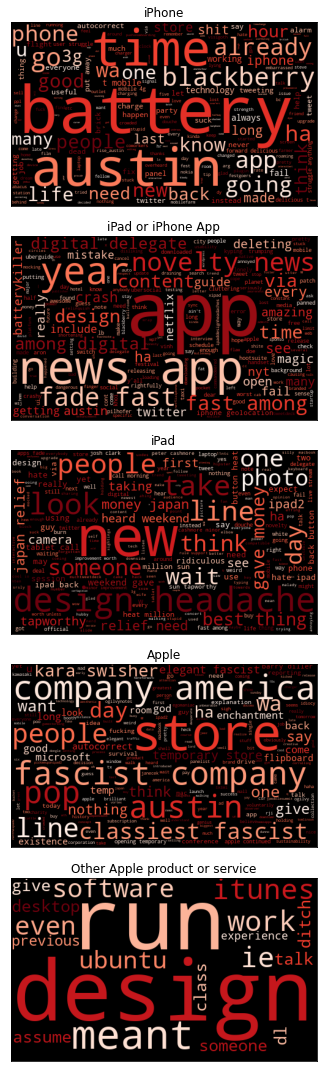

In [181]:
wordcloud_apple_neg, fig_apple_neg = generate_product_wordcloud('Apple', 'Negative', stop_lst_no_comp, colormap='Reds')

For the negative tweets, we can see that a lot of people are not happy about the battery of the iPhones and maybe thinking that "Blackberry" phones are better. Furthermore, "3g" performance may be lacking since it is highlighted in the word cloud as well. Looking at other products, the Apple news app seems to be not very well liked and there seem to be some complaints about the designs of apps and iPads. The words "button heat" are occurring under iPad as well which may indicate a defect that Apple may want to look into. Additionally, words like "fascist company" show that Apple may want to research why their brand is perceived this way and address it with a marketing campaign. Under other Apple products, we see that "iTunes" and "software" are coming up which may indicate that some users are having issues with these.

## Tweets Related to Google

In [182]:
df_google = df[df['Brand']=='Google']
corpus_google = df_google['Tweet'].to_list()

In [183]:
#tokenize tweets
tokens_google = tokenize_tweets(corpus_google)
#lemmatize tweets
tokens_google_lemm = lemmatize_tokens(tokens_google)
#remove stop words & punctuation using the same stop words list
tokens_google_ls = remove_stop(tokens_google_lemm, stop_list = stop_lst)

### Word Cloud with Company/Product Information

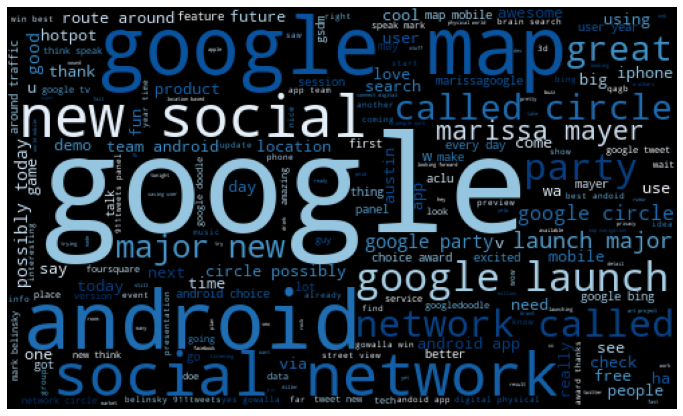

In [184]:
#generating word cloud for negative tweets
generate_wordcloud(tokens_google_ls, colormap='Blues', collocations=True)

### Word Cloud without Company/Product Information

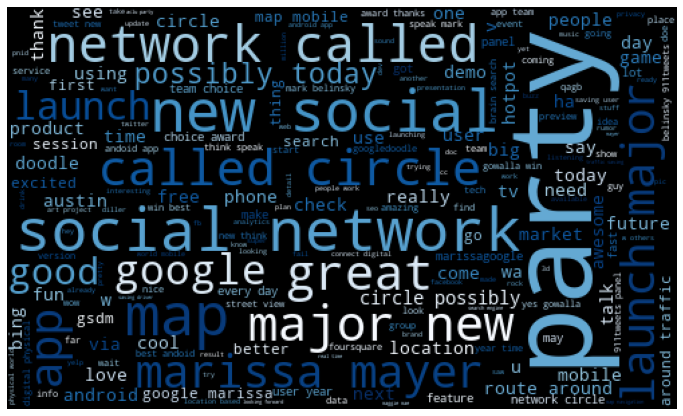

In [185]:
tokens_google_ls = remove_stop(tokens_google_ls, stop_list = stop_lst_no_comp)
generate_wordcloud(tokens_google_ls, colormap='Blues', collocations=True)

### Percentage of Positive, Neutral and Negative Sentiment

As we discussed above, looking at tweet sentiment percentages can also give an overall picture of how the company and its products are mentioned.

In [186]:
df_google_sentiment = pd.DataFrame(df_google['Emotion'].value_counts(normalize=True)).reset_index()
df_google_sentiment.columns=['Emotion', 'Percentage']
display(df_google_sentiment)
df_google_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Emotion  Percentage
0  Positive    0.820776
1  Negative    0.149543
2   Neutral    0.029680

Text(0.5, 1.0, 'Sentiment Percentages for Tweets about Google')

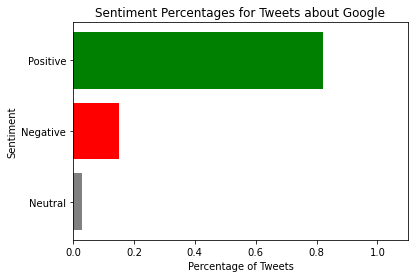

In [187]:
fig, ax = plt.subplots()
ax.barh(df_google_sentiment['Emotion'], df_google_sentiment['Percentage'], color=['Grey', 'Red', 'Green'])
ax.set_xlim(0, 1.1)
ax.set_xlabel('Percentage of Tweets')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Percentages for Tweets about Google')

Once again, taking our analysis to a more granular level and looking at the specific products under each sentiment can reveal more information.

### Sentiment Analysis on Google Related Products/Services

#### Positive Sentiment by Product/Service Type

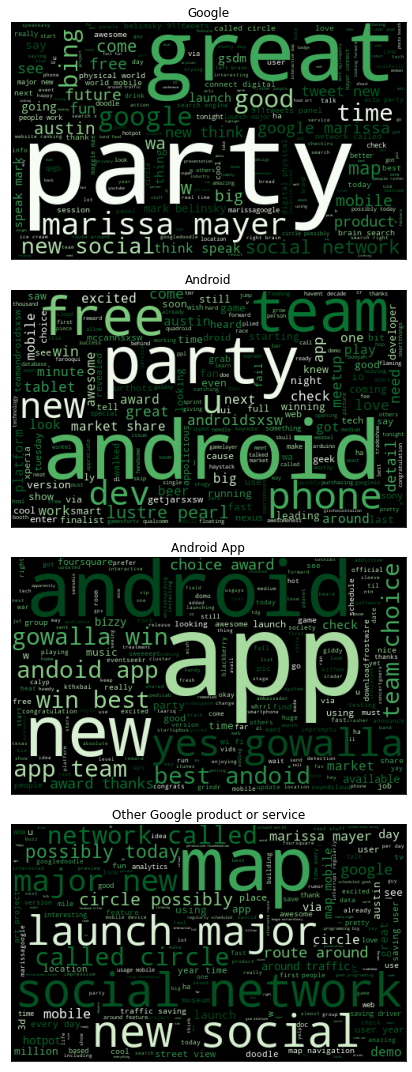

In [188]:
wordcloud_google_pos, fig_google_pos = generate_product_wordcloud('Google', 'Positive', stop_lst_no_comp)

Above, we can see that a lot of people were excited about a "party" presumably at "lustre pearl". Additionally, the words "new social", "social network" show up along with "Marissa Mayer" which suggests that the talk that Marissa Mayer gave created a lot of positive buzz around Google's brand. It may be good for Apple to look into this social network project and evaluate whether they would like to create a product as a competitor. 

Looking at the Android apps, "gowalla" is frequently mentioned along with "choice award". Furthermore the word "map" shows up under Other Google product or service suggesting people really enjoy using Google Maps which Apple should note.

#### Negative Sentiment by Product/Service Type

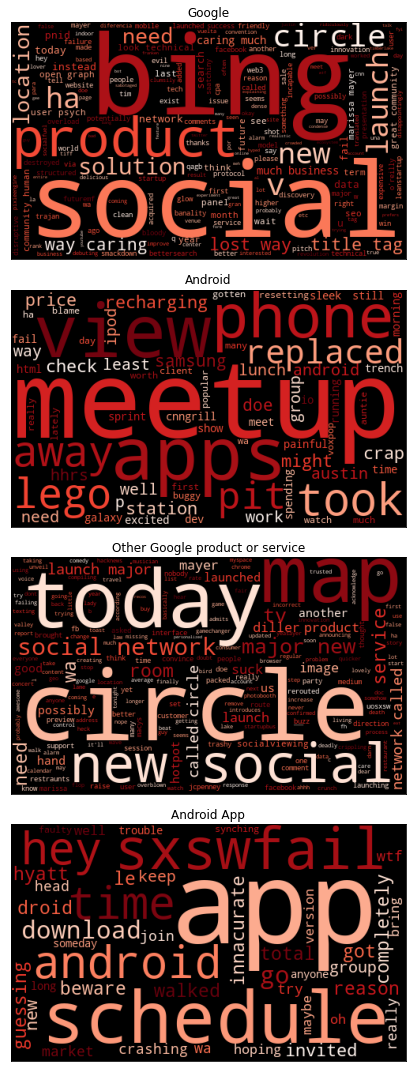

In [189]:
wordcloud_google_neg, fig_google_neg = generate_product_wordcloud('Google', 'Negative', stop_lst_no_comp, colormap='Reds')

On the negative side, we see that Microsoft's Bing is occurring frequently suggesting that Google's search engine may be preferred by users. Even though the new social network announcement was present in the positive tweets it is actually popping up under negative tweets as well. Furthermore, the comments about Android OS include words like "buggy", "replaced", "painful" which may present an opportunity for Apple's iOS.

# MODEL

Now that we have seen that it is possible to use tweets as a means to learn more about people's opinions we can train and test some machine learning models. The dataset we have been using is crowdsourced; however, if Apple wants to stay ahead of their competition and analyze opinions in near realtime, they can't rely on crowdsourcing the labeling of sentiment of each tweet that is about them. Therefore, having a machine learning model that can automatically classify tweets based on the words used is invaluable for future applications.

We are breaking this down into two separate problems: Binary and Multiclass. With Binary Classification our model will be trying to correctly predict whether a tweet is "Positive" or "Negative. With the Multiclass Classification, we will be adding the "Neutral" category into the mix to have a three-way classification. Each of these classification types can have any different applications and can be valuable in their own ways.

## Binary Classification

### Data Preparation

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

#### Functionizing Evaluation of Classification Models

In [100]:
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, roc_curve

def classification(y_true, y_pred, X_test, X_train, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    -----------------------------------
    Arguments:
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_true, cmap='Blues', 
                          normalize='true', ax=ax[0], display_labels=['Negative', 'Positive'])
    
    #Plotting the ROC curve
    plot_roc_curve(estimator=clf, X=X_test, y=y_true, ax=ax[1])
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

#### Parsing Data to New Dataframe

Because we are going to be developing a model for binary classification, we need to remove neutral emotions from our tweets and binarize our target column which is the 'Emotion' column. 

In [101]:
#removing neutral tweets for binary classification
df_binary = df[df['Emotion']!='Neutral']
#verifying that neutral tweets have been removed
df_binary['Emotion'].unique()

array(['Negative', 'Positive'], dtype=object)

In [102]:
#binarizing emotion column
emotion_dict = {'Negative': 0, 'Positive': 1}
df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)

<ipython-input-102-c21124fb8c6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)


#### train_test_split of Dataset

In [103]:
#train_test_split the dataset
y = df_binary['Emotion']
X = df_binary['Tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Modelling

#### Dummy Classifier - Baseline

In order to be able to evaluate our model performances and truly assess how well they are performing compared to random guessing, we will build a dummy classifier as our baseline.

##### Vanilla Dummy Model

In [104]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Training Score: 0.73             Test Score:0.74


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       134
           1       0.86      0.84      0.85       751

    accuracy                           0.74       885
   macro avg       0.52      0.52      0.52       885
weighted avg       0.75      0.74      0.75       885



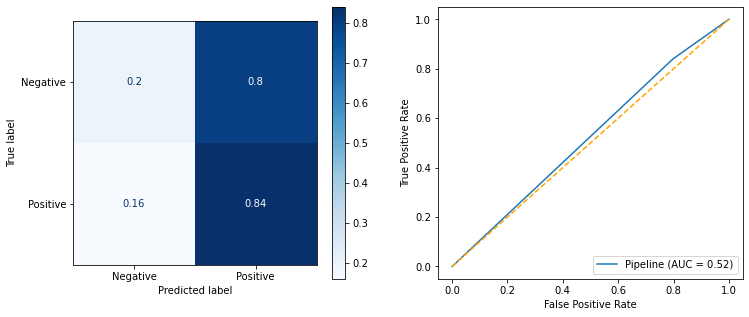

In [105]:
from sklearn.dummy import DummyClassifier

clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', DummyClassifier(random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

The dummy classifier is correctly guessing 84% of the tweets as "Positive". This suggests that there is a class imbalance with the data that we have with mostly "Positive" tweets.

In [199]:
df_binary['Emotion'].value_counts(normalize=True)

1    0.83922
0    0.16078
Name: Emotion, dtype: float64

We can see that we indeed have a class imbalance problem. To address this we can randomly oversample our tweets. Since we will most likely be using this technique in our actual models too we should create a dummy classifier that has the oversampled data as well to serve as a baseline.

##### Random Oversampled Dummy Model

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Training Score: 0.51             Test Score:0.48


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.42      0.19       134
           1       0.82      0.49      0.61       751

    accuracy                           0.48       885
   macro avg       0.48      0.45      0.40       885
weighted avg       0.72      0.48      0.55       885



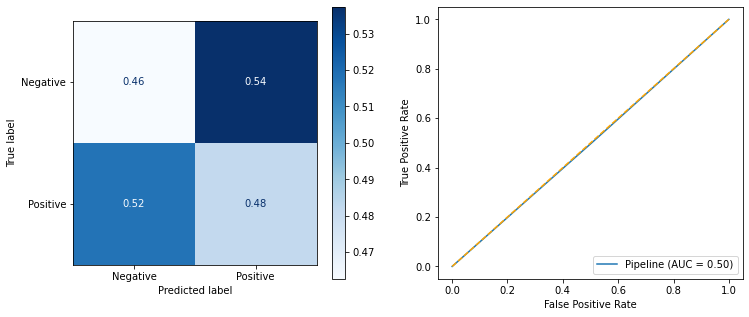

In [87]:
from imblearn.over_sampling import RandomOverSampler
import imblearn.pipeline

clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', DummyClassifier())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

We can see that the random oversampling helped level out the predictions and reduced True Positive (TP) rated to 0.48 while the True Negative (TN) increased to 0.46. Now that we have our baselines we can start trying out different models.

#### Multinomial Bayes

##### Pipelines for Preprocessing and Modelling

In [88]:
#creating a pipeline to vectorize, remove stop words and model
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('clf', MultinomialNB())])

##### MNB Model #1

Training Score: 0.86             Test Score:0.86


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.04      0.09       134
           1       0.85      1.00      0.92       751

    accuracy                           0.86       885
   macro avg       0.93      0.52      0.50       885
weighted avg       0.88      0.86      0.79       885



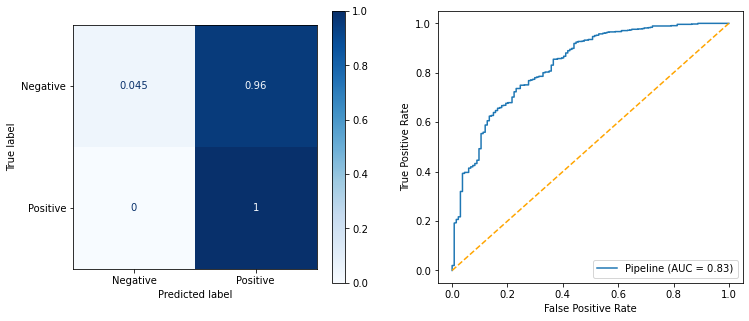

In [89]:
#fitting, predicting and evaluating
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

It looks like our model is predicting almost all predictions as positive which may be caused by the class imbalance issue. It also is not overfitting to the training data which is great to see.

Before we employ any oversampling or undersampling to address this class imbalance we can try to tune the model a bit and see if it improves the performance at all. Since Multinomial Naive Bayes is not a very complex model, the parameters that we can tune are fairly limited. We will be trying out different values for the alpha values (learning rate) in this case. Additionally, we are going to optimize the model for recall macro since we would like to increase both the TN and TP's since we care about correctly predicting both "Negative" and "Positive" predictions.

##### Hyperparameter Tuning with GridSearchCV

In [91]:
if run_gridsearches == True:
    param_grid = {'clf__alpha': [0.001, 0.01, 0.1, 1],
                  'vectorizer__stop_words': [stop_lst, 'english']}
    gridsearch = GridSearchCV(clf_pipe, param_grid=param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

It looks like the stop_lst that we customized during our EDA performed better than the default 'english' stop words list and the learning rate of 0.1 was the best value amongst all the values we tried. Let's try these parameters in a new model.

##### Tuned MNB Model #1

Training Score: 0.98             Test Score:0.89


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       134
           1       0.91      0.97      0.94       751

    accuracy                           0.89       885
   macro avg       0.81      0.71      0.75       885
weighted avg       0.88      0.89      0.88       885



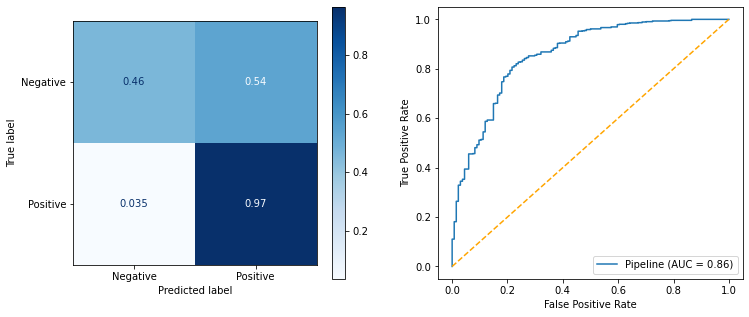

In [92]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('clf', MultinomialNB(alpha=0.01))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

Our model's predictions for negative tweets improved from 0% to 46% with this gridsearch. Compared to the baseline our TN rate has improved by 26% and TP rate improved by 13%. The results are still not ideal since the performance of the model for True Negative values is still fairly low and the model seems to be overfitting to the training data. We can try Random Over Sampling to address the imbalance between positive and negative tweets and see if it helps.

##### MNB Model #2 - Random Over Sampling

Training Score: 0.98             Test Score:0.86


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       134
           1       0.93      0.90      0.91       751

    accuracy                           0.86       885
   macro avg       0.72      0.75      0.74       885
weighted avg       0.87      0.86      0.86       885



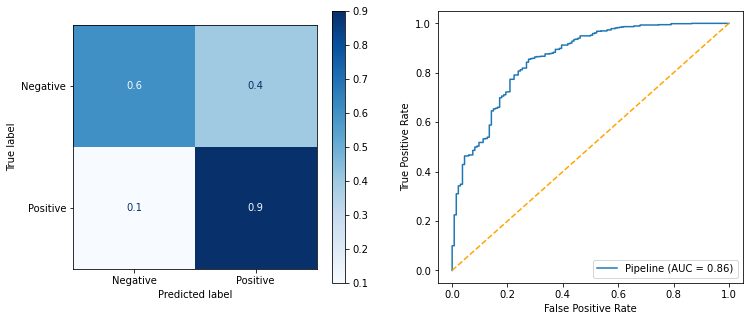

In [93]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', MultinomialNB(alpha=0.1))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

Even though the model's performance on correctly identifying positive tweets has gone down from 97% to 90%, the model is performing much better (60% compared to 46%) in identifying negative tweets now that the data has been oversampled. Unfortunately the model is overfitting to the training data so we can try to tune this oversampled model.

##### Tuning Random Oversampled MNB Model #2

In [94]:
if run_gridsearches == True:
    param_grid = {'clf__alpha': [0.001, 0.01, 0.1, 1],
                  'vectorizer__stop_words': [stop_lst, 'english']}
    gridsearch = GridSearchCV(clf_pipe, param_grid=param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

We can see that the alpha value of 1 and our custom stop_lst were the best parameters for optimizing the recall macro average.

##### Tuned MNB Model #2

Training Score: 0.95             Test Score:0.85


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.72      0.59       134
           1       0.95      0.87      0.91       751

    accuracy                           0.85       885
   macro avg       0.72      0.79      0.75       885
weighted avg       0.88      0.85      0.86       885



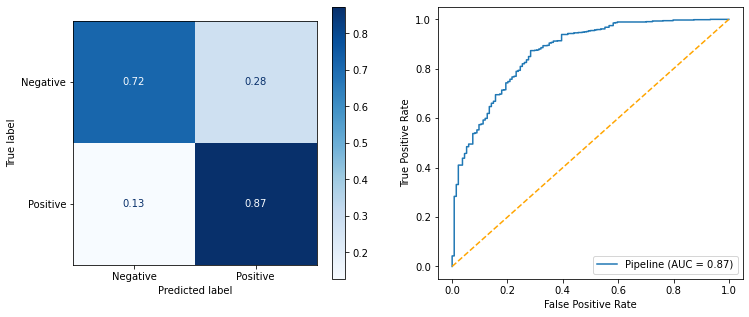

In [95]:
from imblearn.over_sampling import RandomOverSampler
import imblearn.pipeline

clf_pipe_ros_mnb_tuned = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize,
                                                                     stop_words=stop_lst)), 
                                       ('os', RandomOverSampler()),
                                       ('clf', MultinomialNB(alpha=1))])
clf_pipe_ros_mnb_tuned.fit(X_train, y_train)
y_pred = clf_pipe_ros_mnb_tuned.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe_ros_mnb_tuned)

With the tuned parameters, the model's performance in identifying negative tweets has increased to 72% from the prior 60%. With this adjustment however, we are compromising on correctly identifying the positive tweets at 86% compared to the 90% prior. Since we ran our gridsearch to optimize for the recall macro score this behavior is expected. As a result, this tuned and oversampled MNB model is performing 26% better than the oversampled baseline in predicting TN's and 39% better in predicting TP's. The best model among the MNB models was the tuned random oversampled model we just looked at with a recall macro average score of 0.79.

Now that we have tried several options for the Multinomial Naive Bayes model, we can try and evaluate a more complex model such as the Random Forest Classifier.

#### Random Forest

Since Random Forest has a class_weight parameter that we can specify to try to address the class imbalance issue without having to oversample, we will try this option in our base model. 

##### RF Model #1

Training Score: 1.0             Test Score:0.89


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.28      0.43       134
           1       0.89      1.00      0.94       751

    accuracy                           0.89       885
   macro avg       0.91      0.64      0.69       885
weighted avg       0.89      0.89      0.86       885



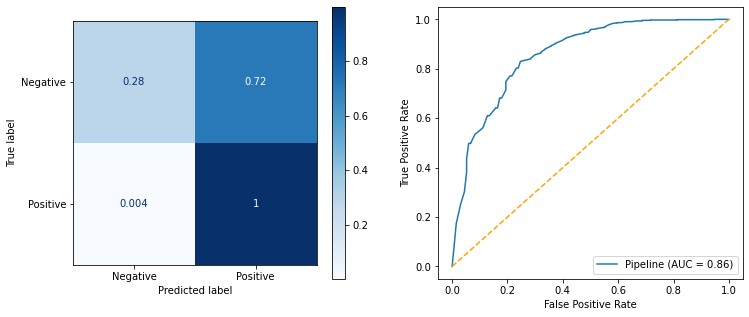

In [96]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

We can see that the Random Forest model is performing similarly to the initial Multinomial Naive Bayes model: the performance of identifying negative tweets is fairly low at 28% while the positive tweet identification is 100%. Additionally, based on the training and test scores, it seems like the model is overfit. Next, we will try to tune the model.

##### Hyperparameter Tuning with GridSearchCV

In [97]:
if run_gridsearches == True:
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3]
           }

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

Now that we have the best parameters for optimizing the recall macro score, we can go ahead and see how the model performs with these.

##### Tuned RF Model #1

Training Score: 0.78             Test Score:0.76


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.34      0.62      0.44       134
           1       0.92      0.79      0.85       751

    accuracy                           0.76       885
   macro avg       0.63      0.70      0.64       885
weighted avg       0.83      0.76      0.79       885



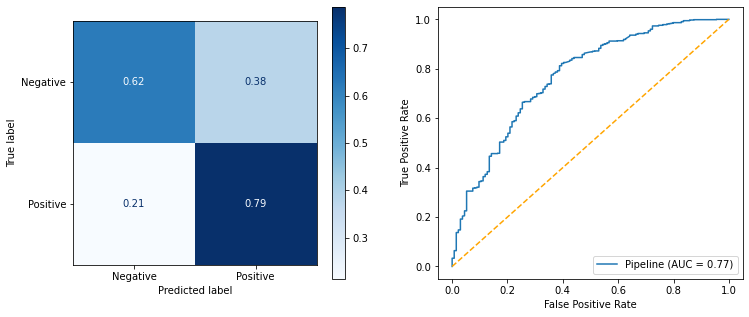

In [98]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42, 
                                                    criterion='gini', max_depth=10,
                                                    min_samples_leaf=3))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

After tuning the model, we can see that the model correctly identified 62% of the negative tweets which is a 34% improvement on the prior model while positive tweet identification went down to 79% compared to 100%. Compared to the baseline, the model is performing 42% better in predicting TN's but performs 5% worse in predicting TP's. We can once again try to oversample the data and see if the performance of our model improves.

##### RF Model #2 - Random Over Sampling

Training Score: 0.99             Test Score:0.9


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.46      0.58       134
           1       0.91      0.98      0.94       751

    accuracy                           0.90       885
   macro avg       0.85      0.72      0.76       885
weighted avg       0.89      0.90      0.89       885



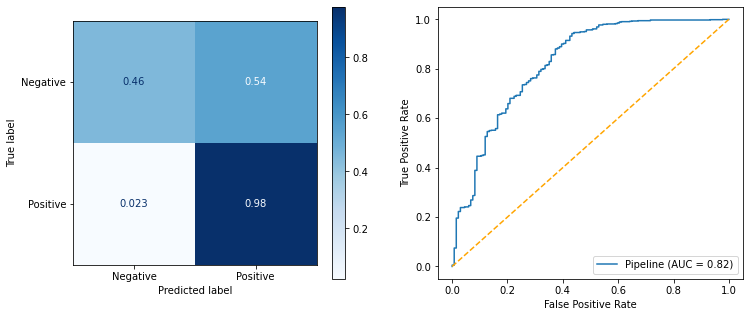

In [99]:
from imblearn.over_sampling import RandomOverSampler
import imblearn.pipeline

clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42, 
                                                    criterion='entropy', max_depth=None,
                                                    min_samples_leaf=2))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

The random oversampled model seems to perform worse in identifying negative tweets at 46% while it is better at identifying positive tweets at 98%. We can once again try to tune the random oversampled model to see if we can improve on these values.

##### Tuning Random Oversampled RF Model #2

In [100]:
if run_gridsearches == True:
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3],
            'vectorizer__norm': ['l1', 'l2']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, 
                              scoring='recall_macro', n_jobs=2)

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned RF Model #2

Training Score: 0.86             Test Score:0.79


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.63      0.47       134
           1       0.93      0.81      0.87       751

    accuracy                           0.79       885
   macro avg       0.65      0.72      0.67       885
weighted avg       0.84      0.79      0.81       885



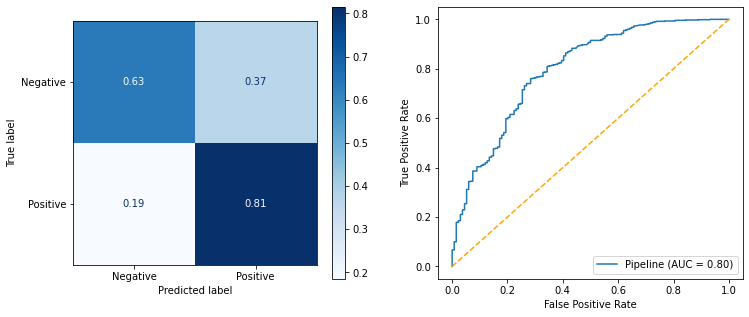

In [101]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                                      stop_words=stop_lst,
                                                                      norm='l2')), 
                                       ('os', RandomOverSampler(random_state=42)), 
                                       ('clf', RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42, 
                                                    criterion='gini', max_depth=20,
                                                    min_samples_leaf=1))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

This is definitely the best model out of all the Random Forest models with 63% correct identification of negative tweets, and 81% correct identification of positive tweets. Compared to the random oversampled baseline, this model performed 17% better in predicting TN's and 33% better in predicting TP's with an overall recall macro average score of 0.72.

Lastly, we can try out logistic regression models for the task at hand to see if we can improve on the results we got from the Multinomial Naive Bayes and Random Forest models.

#### Logistic Regression

Similar to the Random Forest models, Logistic Regression takes in an optional class_weight argument. Since we know that we have a class imbalance, we will once again try the model with class_weight='balanced' to begin with.

##### LR Model #1

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training Score: 1.0             Test Score:0.88


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       134
           1       0.93      0.93      0.93       751

    accuracy                           0.88       885
   macro avg       0.77      0.76      0.76       885
weighted avg       0.88      0.88      0.88       885



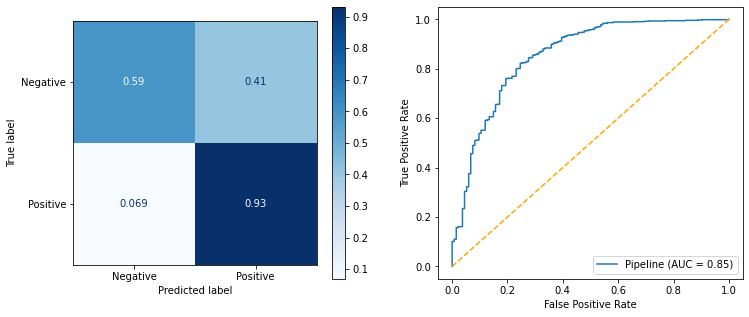

In [102]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                    random_state=42, cv=3))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

The model correctly identified 59% of the negative and 93% of the positive tweets. However, we are getting some warnings stating that our model's maximum iteration value was too low and that the model was unable to converge. We can add this parameter as well as other parameters to tune our model and try to get better performance.

##### Hyperparameter Tuning with GridSearchCV

In [103]:
if run_gridsearches == True:
    param_grid = {'clf__class_weight': ['balanced'],
                  'clf__max_iter': [100, 500, 1000], 
                  'clf__Cs': [[0.01], [0.1], [1]], 
                  'clf__solver': ['liblinear', 'lbfgs', 'sag']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned LR Model #1

Training Score: 0.95             Test Score:0.86


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       134
           1       0.94      0.89      0.91       751

    accuracy                           0.86       885
   macro avg       0.73      0.78      0.75       885
weighted avg       0.88      0.86      0.86       885



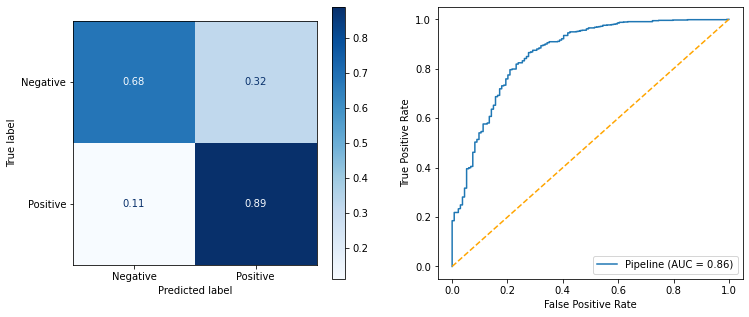

In [104]:
clf_pipe_tuned_LR = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                  random_state=42, cv=3, 
                                                  Cs=[1], max_iter=100, solver='liblinear'))])

clf_pipe_tuned_LR.fit(X_train, y_train)
y_pred = clf_pipe_tuned_LR.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe_tuned_LR)

We can see that the tuned model ended up performing 9% better compared to previous model and 48% better compared to the baseline model in predicting TN's. However, we compromised on the TP rate and now the model is performing 5% worse compared to the previous model but still 5% better than the baseline model. This model is also still overfitting to the training data unfortunately. Next we can try oversampling once again.

##### LR Model #2 - Random Oversampling

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training Score: 1.0             Test Score:0.88


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       134
           1       0.92      0.93      0.93       751

    accuracy                           0.88       885
   macro avg       0.76      0.75      0.75       885
weighted avg       0.87      0.88      0.88       885



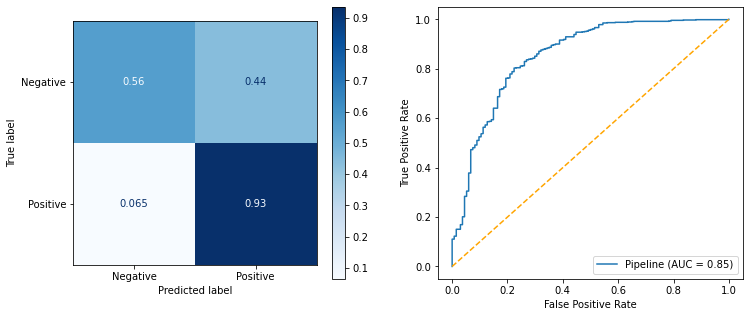

In [106]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                                      stop_words=stop_lst,
                                                                      norm='l2')), 
                                       ('os', RandomOverSampler(random_state=42)), 
                                       ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                                    random_state=42, cv=3))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

The oversampled base LR model performed 12% worse in predicting TN's and 4% better in predicting TP's compared to the previous model. It is also overfitting pretty severely to the training data. Next, we can try to tune the model to see if we can improve on the performance of the model.

##### Tuning Random Oversampled LR Model #2

In [107]:
if run_gridsearches == True:
    param_grid = {'clf__max_iter': [100, 500, 1000], 
                  'clf__Cs': [[0.01], [0.1], [1]], 
                  'clf__solver': ['liblinear', 'lbfgs', 'sag']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned LR Model #2

Training Score: 0.83             Test Score:0.77


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.69      0.48       134
           1       0.93      0.79      0.85       751

    accuracy                           0.77       885
   macro avg       0.65      0.74      0.67       885
weighted avg       0.85      0.77      0.80       885



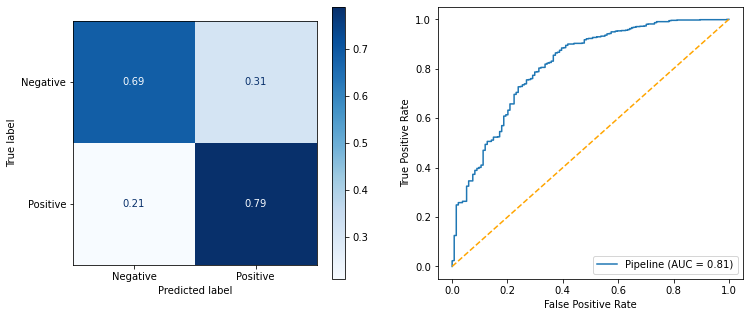

In [108]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                                      stop_words=stop_lst,
                                                                      norm='l2')), 
                                       ('os', RandomOverSampler(random_state=42)), 
                                       ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                                    random_state=42, cv=3,
                                                                    Cs=1, solver='liblinear'))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
classification(y_test, y_pred, X_test, X_train, clf_pipe)

We once again compromised on our TP rate and it went down by 14% compared to the previous model but we gained 13% on the TN rate.

Between all the Logistic Regression models we've tried the tuned non-oversampled model performed the best with a recall macro average score of 0.78. Looking at all the models, the best model we have is arguably either the Tuned Random Oversampled Multinomial Naive Bayes with a recall macro score of 0.79 or the tuned non-oversampled Logistic Regression model with a recall macro score of 0.78. See Interpret section for more discussions on this.

## Multiclass Classification

Now that we have looked at this as a binary classification problem, it's time to mix in the "Neutral" emotion and try out a couple types of models to see how the performance changes.

### Data Preparation

In [190]:
#verifying that we have all three emotions in the original df
df['Emotion'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [191]:
#mapping emotion column to numerical values
emotion_dict = {'Negative': 0, 'Neutral':1, 'Positive': 2}
df['Emotion'] = df['Emotion'].map(emotion_dict)
df['Emotion'].value_counts()

1    5375
2    2970
0     569
Name: Emotion, dtype: int64

In [192]:
y= df['Emotion']
X= df['Tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [193]:
y_train.value_counts(normalize=True)

1    0.604338
2    0.333732
0    0.061930
Name: Emotion, dtype: float64

Not surprisingly, we have a class imbalance problem to address with the multiclass classification as well. Once again, we will be trying both regular modeling and random oversampling the data prior to modeling to see which method produces a better model. Before we can do this though, we need to modify our evaluation function to be able to handle a multiclass model.

In [194]:
#modifying "classification()" function for multiclass classification

def multiclass_eval(y_true, y_pred, X_test, X_train, clf, n_class=3):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality
    for multiclass models.
    
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X_test: X_test values from train_test_split
    X_train: X_train values from train_test_split"""
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_true, cmap='Greens', 
                          normalize='true', ax=ax[0], display_labels=['Negative', 'Neutral', 'Positive'])
    
    pred_prob = clf.predict_proba(X_test)
    
    #Plotting the ROC curve
    fpr={}
    tpr={}
    thresh={}
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:,i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
    ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
    ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

### Modelling

#### Dummy Classifier - Baseline

We need to re-establish our baseline models for the multiclass problem at hand. We will once again be creating a model with the raw data as well as another one with the random oversampled data to fit the data being fed into each model.

##### Vanilla Dummy Model

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Training Score: 0.48             Test Score:0.48


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.08      0.07      0.07       155
           1       0.60      0.61      0.60      1335
           2       0.33      0.33      0.33       739

    accuracy                           0.48      2229
   macro avg       0.34      0.34      0.34      2229
weighted avg       0.48      0.48      0.48      2229



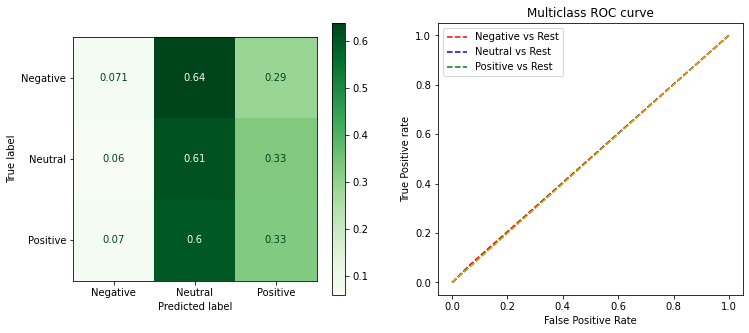

In [114]:
from sklearn.dummy import DummyClassifier

clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', DummyClassifier(random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

We can see that the class imbalance is apparent from the confusion matrix. Most tweets we have are labeled as "Neutral", followed by "Positive" and then "Negative". Therefore, our dummy model is following suit with how high its performance is for each of these classes.

##### Random Oversampled Dummy Model

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Training Score: 0.33             Test Score:0.33


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.06      0.30      0.10       155
           1       0.58      0.32      0.41      1335
           2       0.32      0.33      0.33       739

    accuracy                           0.32      2229
   macro avg       0.32      0.32      0.28      2229
weighted avg       0.46      0.32      0.36      2229



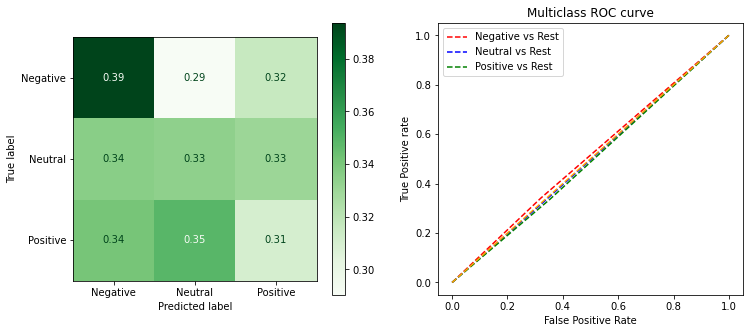

In [115]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', DummyClassifier())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Looking at the random oversampled baseline, we can see that random oversampling definitely leveled out the playing field once again and the model is performing about equally with all three classes. 

Now that we have our baseline models, let's start developing some Random Forest models.

#### Random Forest

##### RF Model #1

Training Score: 0.96             Test Score:0.67


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.20      0.31       155
           1       0.70      0.83      0.76      1335
           2       0.60      0.49      0.54       739

    accuracy                           0.67      2229
   macro avg       0.65      0.51      0.53      2229
weighted avg       0.66      0.67      0.65      2229



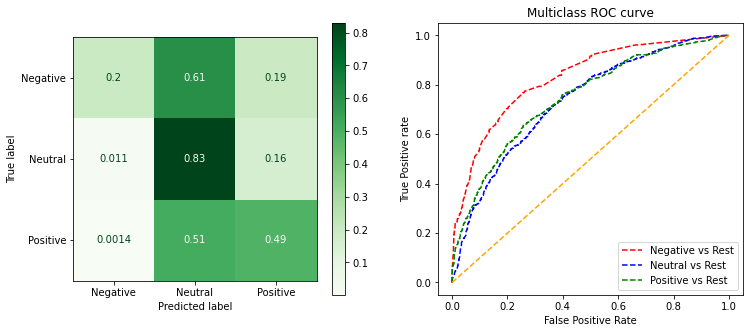

In [116]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

As seen above, the model is overfitting to the training data and is performing well on Neutral predictions while both Positive and Negative predictions are still quite low even though they are much better compared to the baseline.

##### Hyperparameter Tuning with GridSearchCV

In [117]:
if run_gridsearches == True:
    
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3]}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned RF Model #1

Training Score: 0.83             Test Score:0.63


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.32      0.34       155
           1       0.75      0.67      0.71      1335
           2       0.52      0.63      0.57       739

    accuracy                           0.63      2229
   macro avg       0.54      0.54      0.54      2229
weighted avg       0.65      0.63      0.64      2229



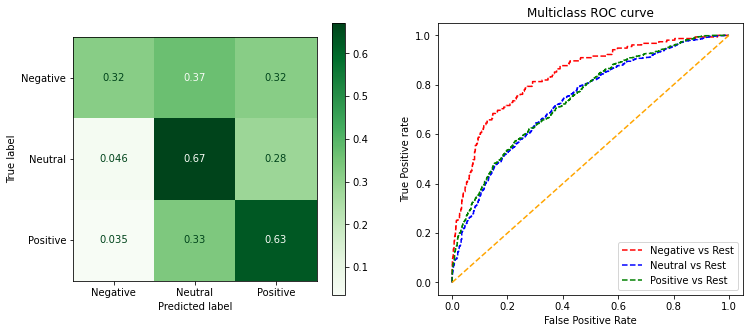

In [118]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', RandomForestClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    min_samples_leaf=2,
                                                    random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Tuning the model has increased TP rate by 14% and TN rate by 12% while lowering the True Neutral (TNeu) by 16%. However, the model is still quite overfit to training data.

##### RF Model #2 - Random Oversampling

Training Score: 0.96             Test Score:0.68


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.23      0.33       155
           1       0.73      0.79      0.75      1335
           2       0.58      0.57      0.58       739

    accuracy                           0.68      2229
   macro avg       0.64      0.53      0.55      2229
weighted avg       0.67      0.68      0.67      2229



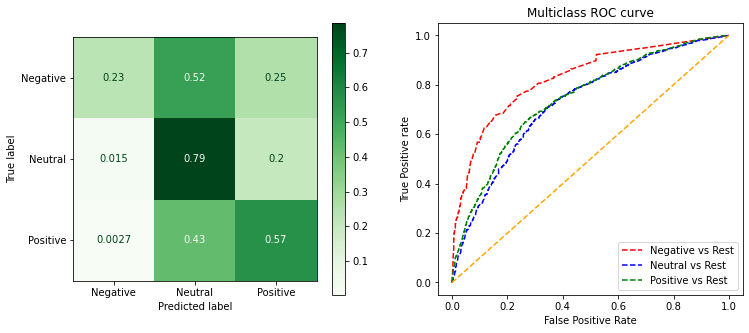

In [119]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', RandomForestClassifier(class_weight='balanced'))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Oversampling the data in this case hasn't really helped with the neutral class still being higher relative to the positive and negative classes.

##### Tuning Random Oversampled RF Model #2

In [120]:
if run_gridsearches == True:
    param_grid = {'clf__criterion': ['gini', 'entropy'], 
            'clf__max_depth': [10, 20, None],
            'clf__min_samples_leaf': [1, 2, 3],
            'vectorizer__norm': ['l1', 'l2']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, 
                              scoring='recall_macro', n_jobs=2)

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned RF Model #2

Training Score: 0.88             Test Score:0.66


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.32      0.36       155
           1       0.74      0.73      0.73      1335
           2       0.55      0.59      0.57       739

    accuracy                           0.66      2229
   macro avg       0.57      0.55      0.56      2229
weighted avg       0.65      0.66      0.65      2229



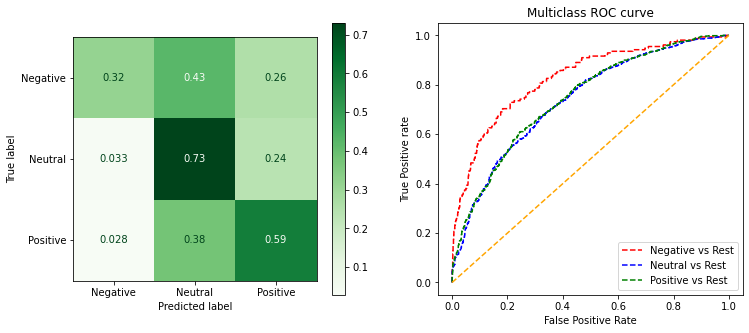

In [121]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_lst)),
                     ('os', RandomOverSampler(random_state=42)),
                     ('clf', RandomForestClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    min_samples_leaf=2,
                                                    random_state=42))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Tuning the model improved the TN rate by 9%, and TP rate by 2% while the TNeu rate is now 6% lower. 

Amongst all the RF models, the last model (tuned oversampled RF) has the highest recall macro average score of 0.55, performs 40% better in predicting Neutral classes and 28% better in predicting Positive classes but performs 7% worse in Negative class predictions compared to the baseline. Additionally, it is still overfitting to training data.

#### Logistic Regression

##### LR Model #1

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training Score: 0.89             Test Score:0.66


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.45      0.41       155
           1       0.77      0.70      0.73      1335
           2       0.57      0.64      0.60       739

    accuracy                           0.66      2229
   macro avg       0.57      0.60      0.58      2229
weighted avg       0.68      0.66      0.67      2229



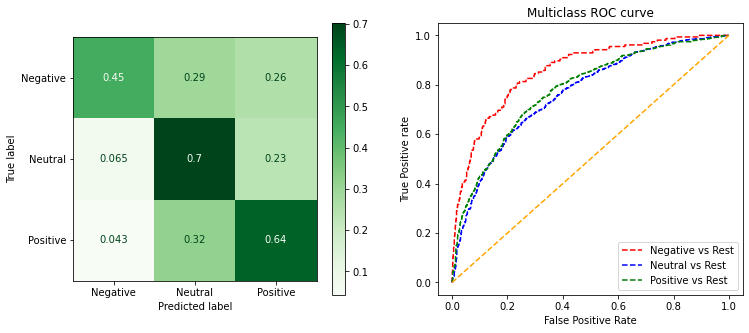

In [195]:
clf_pipe = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                    random_state=42, cv=3))])

clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Without any tuning or adjustments, this model is already performing better than all RF models with a 0.60 recall macro score and performing better in each class compared to the baseline. It is overfitting the training data though so we can tune it and see if we can achieve a non-overfitting model.

##### Hyperparameter Tuning with GridSearchCV

In [196]:
if run_gridsearches == True:
    param_grid = {'clf__class_weight': ['balanced'],
                  'clf__max_iter': [100, 500, 1000], 
                  'clf__Cs': [[0.01], [0.1], [1]], 
                  'clf__solver': ['liblinear', 'lbfgs', 'sag']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned LR Model #1

Training Score: 0.81             Test Score:0.64


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.57      0.42       155
           1       0.78      0.65      0.71      1335
           2       0.56      0.64      0.60       739

    accuracy                           0.64      2229
   macro avg       0.55      0.62      0.57      2229
weighted avg       0.67      0.64      0.65      2229



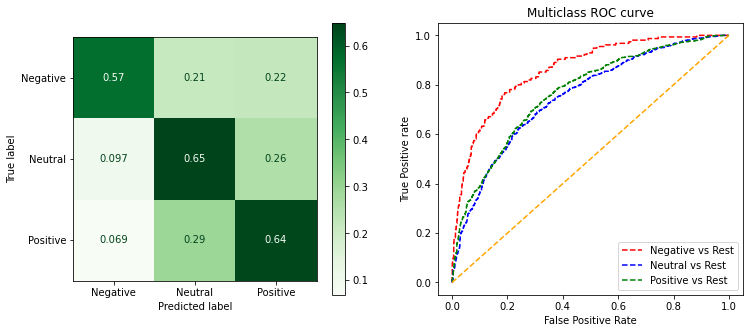

In [197]:
clf_pipe_tuned_LR_multi = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)),
                     ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                  random_state=42, cv=3, solver='liblinear', 
                                                  max_iter=100, Cs=[1]))])

clf_pipe_tuned_LR_multi.fit(X_train, y_train)
y_pred = clf_pipe_tuned_LR_multi.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe_tuned_LR_multi)

The tuned model performed better with a recall macro score of 0.62 compared to the previous model. It is still overfitting the training data but is providing much better predictions compared to the baseline model. Next, we can try to oversample the data again.

##### LR Model #2 - Random Oversampling

C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\berke\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training Score: 0.95             Test Score:0.66


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.42      0.41      0.41       155
           1       0.75      0.73      0.74      1335
           2       0.57      0.60      0.59       739

    accuracy                           0.66      2229
   macro avg       0.58      0.58      0.58      2229
weighted avg       0.67      0.66      0.67      2229



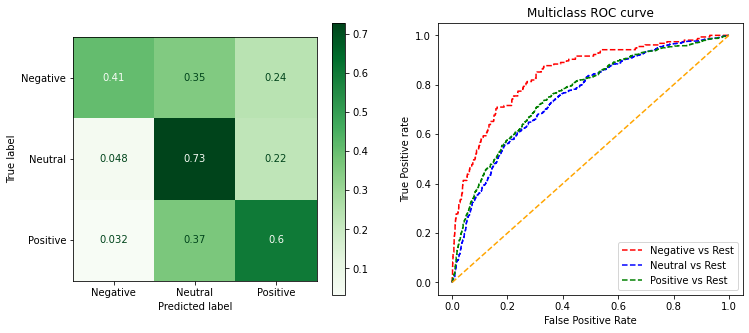

In [125]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                                      stop_words=stop_lst,
                                                                      norm='l2')), 
                                       ('os', RandomOverSampler(random_state=42)), 
                                       ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                                    random_state=42, cv=3))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

Oversampling the data doesn't seem to have improved the model based on the recall macro score of 0.58 and the model is overfitting to training data once again.

##### Tuning Random Oversampled LR Model #2

In [126]:
if run_gridsearches == True:
    param_grid = {'clf__max_iter': [100, 500, 1000], 
                  'clf__Cs': [[0.01], [0.1], [1]], 
                  'clf__solver': ['liblinear', 'lbfgs', 'sag']}

    gridsearch = GridSearchCV(estimator=clf_pipe, param_grid = param_grid, scoring='recall_macro')

    gridsearch.fit(X_train,  y_train)
    gridsearch.best_params_

##### Tuned LR Model #2

Training Score: 0.84             Test Score:0.66


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.54      0.43       155
           1       0.77      0.69      0.73      1335
           2       0.57      0.63      0.60       739

    accuracy                           0.66      2229
   macro avg       0.57      0.62      0.59      2229
weighted avg       0.68      0.66      0.67      2229



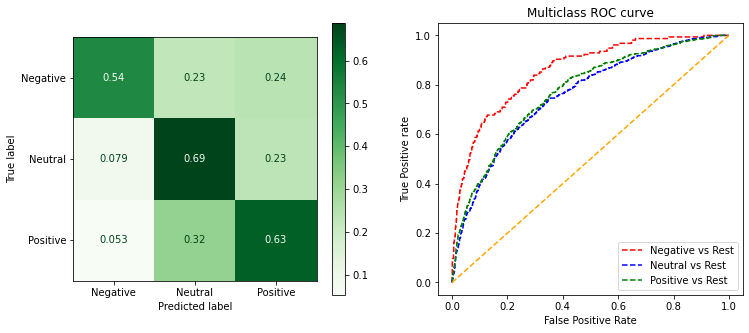

In [127]:
clf_pipe = imblearn.pipeline.Pipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                                      stop_words=stop_lst,
                                                                      norm='l2')), 
                                       ('os', RandomOverSampler(random_state=42)), 
                                       ('clf', LogisticRegressionCV(class_weight='balanced', 
                                                                    random_state=42, cv=3, solver='liblinear', 
                                                                    max_iter=100, Cs=[1]))])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
multiclass_eval(y_test, y_pred, X_test, X_train, clf_pipe)

The tuned model is performing better compared to the previous model with a recall macro score of 0.62 and less overfitting to training data even though it is still overfit overall.

Comparing all models within the multiclass classification section, the tuned LR model definitely performed the best with 0.62 as its recall macro score. Even though the tuned random oversampled LR model achieved the same macro score, since the data was oversampled to achieve this, the tuned LR model is definitely the best model overall.

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Binary Classification

Throughout the binary classification section, we focused on optimizing our models for the recall macro score since we would like our model to predict both negative and positive tweets correctly. For the binary classification problem, the best model was the tuned random oversampled Multinomial Naive Bayes model based on the recall macro score of 0.79. It was then closely followed by the tuned Logistic Regression model with a recall macro score of 0.78. 

Overall, I consider the Logistic Regression to have won over the Multinomial Naive Bayes model because it was not oversampled and marginally less overfit. It additionally provides more opportunities for tuning the model even further since it is a more complex model.

In order to understand how the models decided whether the tweet was positive or negative we can take a look at the feature importances and coefficients it assigned to each word. We will look at both models for reference to try and see the differences.

In [128]:
#defining a function to extract and plot feature importances from best models
import math
import seaborn as sns
def plot_feature_importance(clf_pipe, n_features, title):
    """Function extracts classifier feature importances from a given pipeline object
    and displays top n_features. 
    -------------------------------
    Arguments:
    clf_pipe: Pipeline object that contains the classifier. Feature importances will be
    extracted from this pipeline's classifier.
    n_features: top number of features to be plotted
    title: title information for axes containing name of type of model"""
    #extracting feature importance information from pipeline
    feature_names = clf_pipe['vectorizer'].get_feature_names()
    coefs = clf_pipe['clf'].coef_[0]
    
    #parsing information to df
    importance_df = pd.DataFrame(feature_names, columns=['Word'])
    importance_df['Importance'] = math.e**(abs(coefs))
    importance_df['Coefficient'] = coefs

    #sorting to find top n_features
    feature_importance = importance_df.sort_values(by = ["Importance"], ascending=False).head(n_features)
    
    #plotting coefficients
    fig, ax = plt.subplots(figsize=(15,10), ncols=2)
    ax[0].set_title(f'Coefficients for {title}')
    ax[0].set_ylabel('Word')
    ax[0].set_xlabel('Coefficient')
    sns.barplot(x='Coefficient', y='Word', data=feature_importance, palette='coolwarm', ax=ax[0])
    #plotting feature importances
    ax[1].set_title(f'Feature Importances for {title}')
    ax[1].set_ylabel('Word')
    ax[1].set_xlabel('Importance')
    sns.barplot(x='Importance', y='Word', data=feature_importance, palette='coolwarm', ax=ax[1])
    plt.tight_layout();

### Feature Importances - Tuned Logistic Regression Model

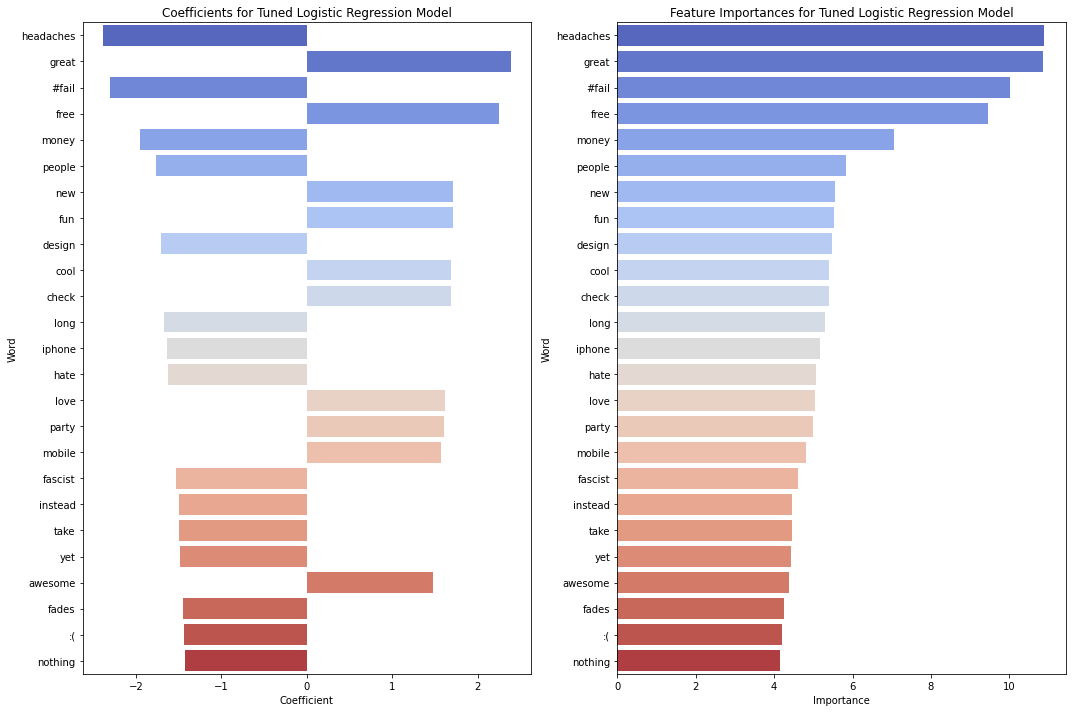

In [129]:
plot_feature_importance(clf_pipe_tuned_LR, 25, 'Tuned Logistic Regression Model')

On the left of the graph, we can see how each word in the tweet affects the model's prediction. If the tweet had words such as "headaches", "#fail" or "money" for example, the model's prediction was pushed towards the tweet being negative while words such as "great", "free", "new" pushed the prediction towards positive.

### Feature Importances - Tuned Random Oversampled MNB Model

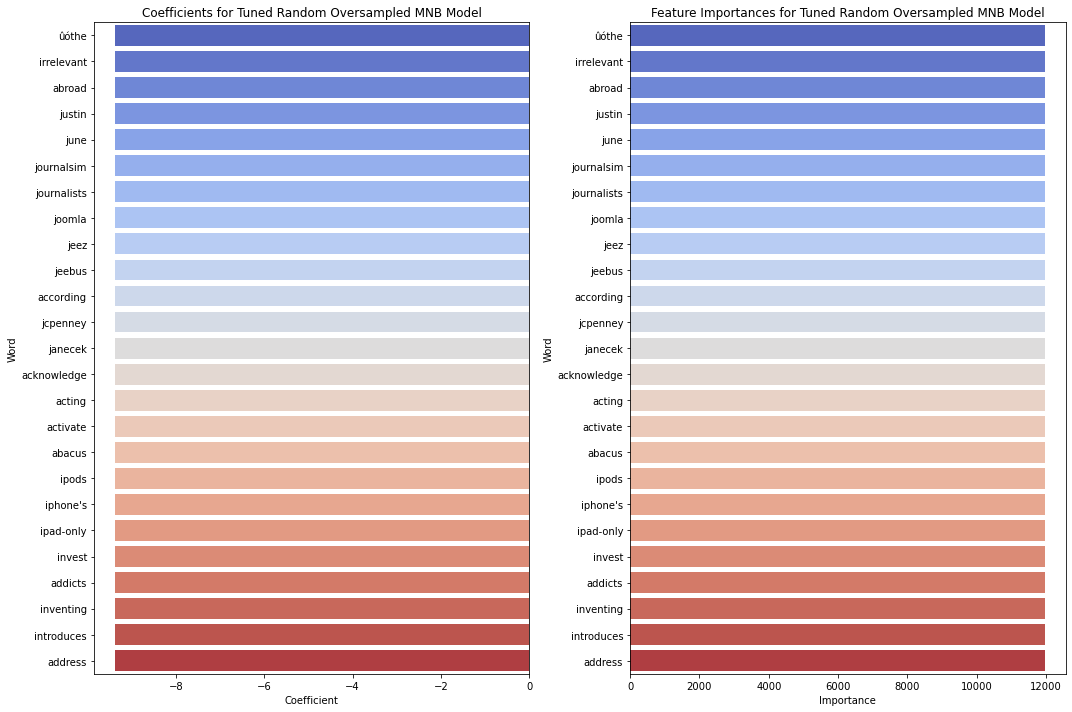

In [130]:
plot_feature_importance(clf_pipe_ros_mnb_tuned, 25, 'Tuned Random Oversampled MNB Model')

Now looking at the Multinomial Naive Bayes model, it seems like there were a lot of words that were deemed very important by the model hence the plots don't show any differences for 25 words. We start to see a difference when we increase the n_features value to around 1000 which is not very helpful.

## Multiclass Classification

Now that we've explored the models for binary classification, what about multiclass classification? Well, as discussed above, the winner of this task was the tuned oversampled logistic regression model with a recall macro score of 0.62. The tuned random oversampled logistic regression model also scored the same 0.62; however, since it got to the same score only after the random oversampling we are declaring the non-oversampled model as the winner.

### Feature Importances - Tuned Logistic Regression Model

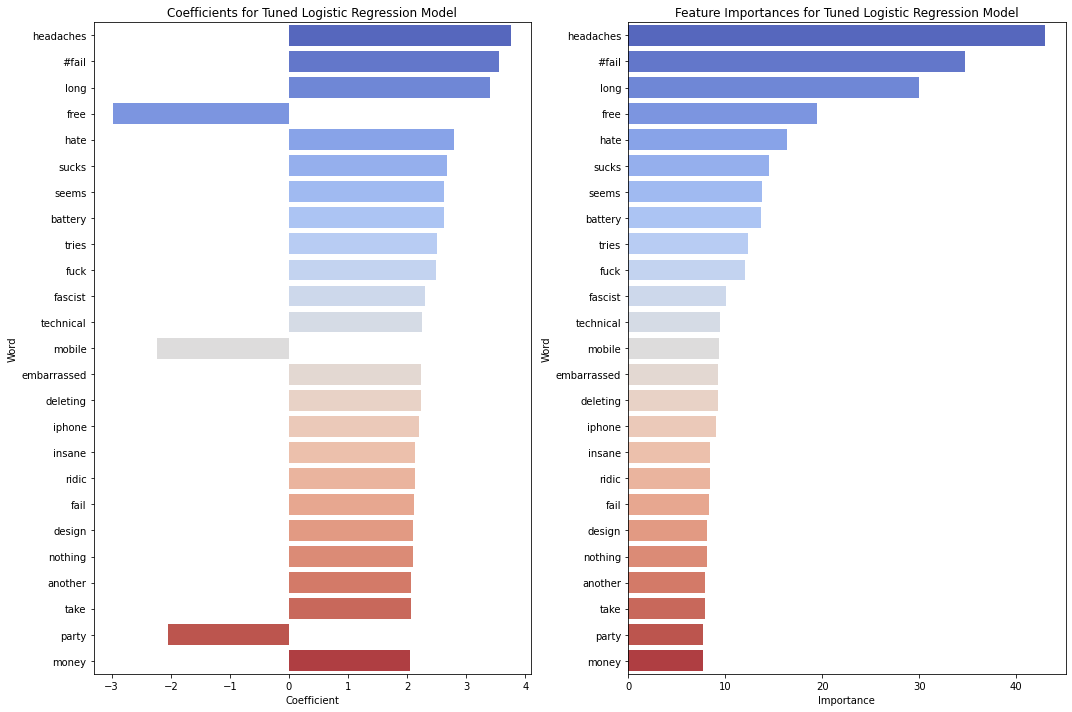

In [131]:
plot_feature_importance(clf_pipe_tuned_LR_multi, 25, 'Tuned Logistic Regression Model')

Above, not surprisingly, we can see that the model assigned importances and coefficients differently compared to the best binary classification model. Since this is a multiclass model, it is more difficult to interpret how each word is affecting the prediction; however, it still provides insight into important words that Apple and Google should keep an eye out for which include words like "headaches", "#fail", "hate", "battery" etc.

# CONCLUSIONS & RECOMMENDATIONS

## Conclusions

Today, it is more important than ever for businesses to be in tune with their customers. "Listening" to the public opinion on their products and services not only allows for them to maintain financial success, but also provides them with opportunities to stay competitive in the market. To sum up, our analysis showed the following:

## Recommendations

## Limitations & Next Steps

The dataset we used was a crowdsourced dataset which brings about certain challenges. One of which is that labeling tweets as "Positive", "Negative" or "No emotion" can be a highly subjective exercise. What I may think is a positive tweet, someone else may take it differently and mark it negative. Additionally, context of these tweets matter. Since we don't know the methodology of how the data was labelled, there could have been human error in labeling where a tweet that was meant to be sarcastic can be labeled incorrectly for example. This would make the quality of data suffer. 

Furthermore, our dataset consisted of 9,092 tweets which is a fairly small number. After removing neutral tweets we were only left with around 3,000 tweets for the binary classification. So, the amount of data used was limited. Additionally, the class imbalance was pretty significant with approximately 61% of data being neutral, 33% being positive and 6% being negative. Arguably, the "Negative" class would be much more important than the "Neutral" class in trying to understand where the areas of improvement are.

As next steps, if Apple would like to generalize these models for different applications, we would definitely gather more data from Twitter and potentially other sources. Additionally, if the data had to be labeled by humans, we would set guidelines on what each class of tweet would consist of with examples to make sure that the labels didn't solely rely on emotions.

Lastly, the performance of the models could be greatly improved by rethinking this project with Neural Networks. In the future we would use Deep Learning to classify tweets.